Important Libraries

In [134]:
import pandas as pd
pd.pandas.set_option('display.max_columns',None) # used to display the all columns
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)
import numpy as np
import warnings
warnings.filterwarnings("ignore")
Lb=LabelEncoder
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [135]:
df=pd.read_csv("housing_data.csv")

In [136]:
df.head(2)

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         196        Gd        TA      PConc       Gd       TA           No   
1           0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          No   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal MoSold  YrSold  \
0            0         0     No    No          No        0    Feb    2008   
1            0         0     No    No          No        0    May    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500

In [137]:
df.isnull().sum().iloc[0:51] 
# here iloc is used to display the null values of columns from 1-50

Unnamed: 0         0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [138]:
df.isnull().sum().iloc[52:80]

KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
PoolQC            0
Fence             0
MiscFeature       0
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
dtype: int64

Dropping Some Columns

In [140]:
df.drop(['Alley', 'MasVnrType','Unnamed: 0','MSSubClass'], axis=1, inplace=True)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

Filling Null Values

In [143]:
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(df["GarageYrBlt"]).mode()[0]
df["Electrical"]=df["Electrical"].fillna(df["Electrical"]).mode()[0]
# fill the null values by using the fillna 

In [144]:
df.isnull().sum().iloc[0:51]

MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
dtype: int64

In [145]:
df.isnull().sum().iloc[52:80]

Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

Dividing The Columns

In [147]:
numerical_column=df.select_dtypes(include=['int']).columns

In [148]:
numerical_column

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')

In [149]:
categorical=df.select_dtypes(include=['object','float']).columns

In [150]:
categorical

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [151]:
categorical = df.select_dtypes(include=['object']).columns
categorical

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [152]:
year_columns = [column for column in numerical_column if 'yr' in column.lower() or 'year' in column.lower()]
year_columns

['YearBuilt', 'YearRemodAdd', 'YrSold']

In [153]:
for column in year_columns:
    print(column,df[column].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
YrSold [2008 2007 2006 2009 2010]


In [154]:
df

MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities  \
0          RL           65     8450   Pave      Reg         Lvl    AllPub   
1          RL           80     9600   Pave      Reg         Lvl    AllPub   
2          RL           68    11250   Pave      IR1         Lvl    AllPub   
3          RL           60     9550   Pave      IR1         Lvl    AllPub   
4          RL           84    14260   Pave      IR1         Lvl    AllPub   
...       ...          ...      ...    ...      ...         ...       ...   
1455       RL           62     7917   Pave      Reg         Lvl    AllPub   
1456       RL           85    13175   Pave      Reg         Lvl    AllPub   
1457       RL           66     9042   Pave      Reg         Lvl    AllPub   
1458       RL           68     9717   Pave      Reg         Lvl    AllPub   
1459       RL           75     9937   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3       Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          FR2       Gtl      NoRidge       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
1455    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
1456    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
1457    Inside       Gtl      Crawfor       Norm       Norm     1Fam   
1458    Inside       Gtl        NAmes       Norm       Norm     1Fam   
1459    Inside       Gtl      Edwards       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0        2Story            7            5       2003          2003     Gable   
1        1Story            6            8       1976          1976     Gable   
2        2Story            7            5       2001          2002     Gable   
3        2Story            7            5       1915          1970     Gable   
4        2Story            8            5       2000          2000     Gable   
...         ...          ...          ...        ...           ...       ...   
1455     2Story            6            5       1999          2000     Gable   
1456     1Story            6            6       1978          1988     Gable   
1457     2Story            7            9       1941          2006     Gable   
1458     1Story            5            6       1950          1996       Hip   
1459     1Story            5            6       1965          1965     Gable   

     RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd         196        Gd        TA   
1     CompShg     MetalSd     MetalSd           0        TA        TA   
2     CompShg     VinylSd     VinylSd         162        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng           0        TA        TA   
4     CompShg     VinylSd     VinylSd         350        Gd        TA   
...       ...         ...         ...         ...       ...       ...   
1455  CompShg     VinylSd     VinylSd           0        TA        TA   
1456  CompShg     Plywood     Plywood         119        TA        TA   
1457  CompShg     CemntBd     CmentBd           0        Ex        Gd   
1458  CompShg     MetalSd     MetalSd           0        TA        TA   
1459  CompShg     HdBoard     HdBoard           0        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0         PConc       Gd       TA           No          GLQ         706   
1        CBlock       Gd       TA           Gd          ALQ         978   
2         PConc       Gd       TA           Mn          GLQ         486   
3        BrkTil       TA       Gd           No          ALQ         216   
4 

In [155]:
df

MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities  \
0          RL           65     8450   Pave      Reg         Lvl    AllPub   
1          RL           80     9600   Pave      Reg         Lvl    AllPub   
2          RL           68    11250   Pave      IR1         Lvl    AllPub   
3          RL           60     9550   Pave      IR1         Lvl    AllPub   
4          RL           84    14260   Pave      IR1         Lvl    AllPub   
...       ...          ...      ...    ...      ...         ...       ...   
1455       RL           62     7917   Pave      Reg         Lvl    AllPub   
1456       RL           85    13175   Pave      Reg         Lvl    AllPub   
1457       RL           66     9042   Pave      Reg         Lvl    AllPub   
1458       RL           68     9717   Pave      Reg         Lvl    AllPub   
1459       RL           75     9937   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3       Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          FR2       Gtl      NoRidge       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
1455    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
1456    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
1457    Inside       Gtl      Crawfor       Norm       Norm     1Fam   
1458    Inside       Gtl        NAmes       Norm       Norm     1Fam   
1459    Inside       Gtl      Edwards       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0        2Story            7            5       2003          2003     Gable   
1        1Story            6            8       1976          1976     Gable   
2        2Story            7            5       2001          2002     Gable   
3        2Story            7            5       1915          1970     Gable   
4        2Story            8            5       2000          2000     Gable   
...         ...          ...          ...        ...           ...       ...   
1455     2Story            6            5       1999          2000     Gable   
1456     1Story            6            6       1978          1988     Gable   
1457     2Story            7            9       1941          2006     Gable   
1458     1Story            5            6       1950          1996       Hip   
1459     1Story            5            6       1965          1965     Gable   

     RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd         196        Gd        TA   
1     CompShg     MetalSd     MetalSd           0        TA        TA   
2     CompShg     VinylSd     VinylSd         162        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng           0        TA        TA   
4     CompShg     VinylSd     VinylSd         350        Gd        TA   
...       ...         ...         ...         ...       ...       ...   
1455  CompShg     VinylSd     VinylSd           0        TA        TA   
1456  CompShg     Plywood     Plywood         119        TA        TA   
1457  CompShg     CemntBd     CmentBd           0        Ex        Gd   
1458  CompShg     MetalSd     MetalSd           0        TA        TA   
1459  CompShg     HdBoard     HdBoard           0        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0         PConc       Gd       TA           No          GLQ         706   
1        CBlock       Gd       TA           Gd          ALQ         978   
2         PConc       Gd       TA           Mn          GLQ         486   
3        BrkTil       TA       Gd           No          ALQ         216   
4 

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

Finding Outliers

In [158]:
numerical_column = df.select_dtypes(include=['number']).columns
for i in numerical_column:
    Q1 = df[i].quantile(0.25)
    print("The first quantile for the column", i, "is given by", Q1)
    Q2 = df[i].quantile(0.50)
    print("The second quantile for the column", i, "is given by", Q2)
    Q3 = df[i].quantile(0.75)
    print("The third quantile for the column", i, "is given by", Q3)
    IQR = Q3 - Q1
    print("The interquartile range for the column", i, "is given by", IQR)
    LL = Q1 - 1.5 * IQR
    print("The lower limit for the column", i, "is given by", LL)
    UL = Q3 + 1.5 * IQR
    print("The upper limit for the column", i, "is given by", UL)
    n = df[(df[i] < LL) | (df[i] > UL)].shape[0]
    print("The number of outliers for column", i, "is given by", n)
    df[i] = np.where((df[i] < LL) | (df[i] > UL), df[i].mean(), df[i])
    m = df[(df[i] < LL) | (df[i] > UL)].shape[0]
    print("The number of outliers after imputation for column", i, "is given by", m)
    print("   ")
    print("   ")


The first quantile for the column LotFrontage is given by 42.0
The second quantile for the column LotFrontage is given by 63.0
The third quantile for the column LotFrontage is given by 79.0
The interquartile range for the column LotFrontage is given by 37.0
The lower limit for the column LotFrontage is given by -13.5
The upper limit for the column LotFrontage is given by 134.5
The number of outliers for column LotFrontage is given by 16
The number of outliers after imputation for column LotFrontage is given by 0
   
   
The first quantile for the column LotArea is given by 7553.5
The second quantile for the column LotArea is given by 9478.5
The third quantile for the column LotArea is given by 11601.5
The interquartile range for the column LotArea is given by 4048.0
The lower limit for the column LotArea is given by 1481.5
The upper limit for the column LotArea is given by 17673.5
The number of outliers for column LotArea is given by 69
The number of outliers after imputation for colum

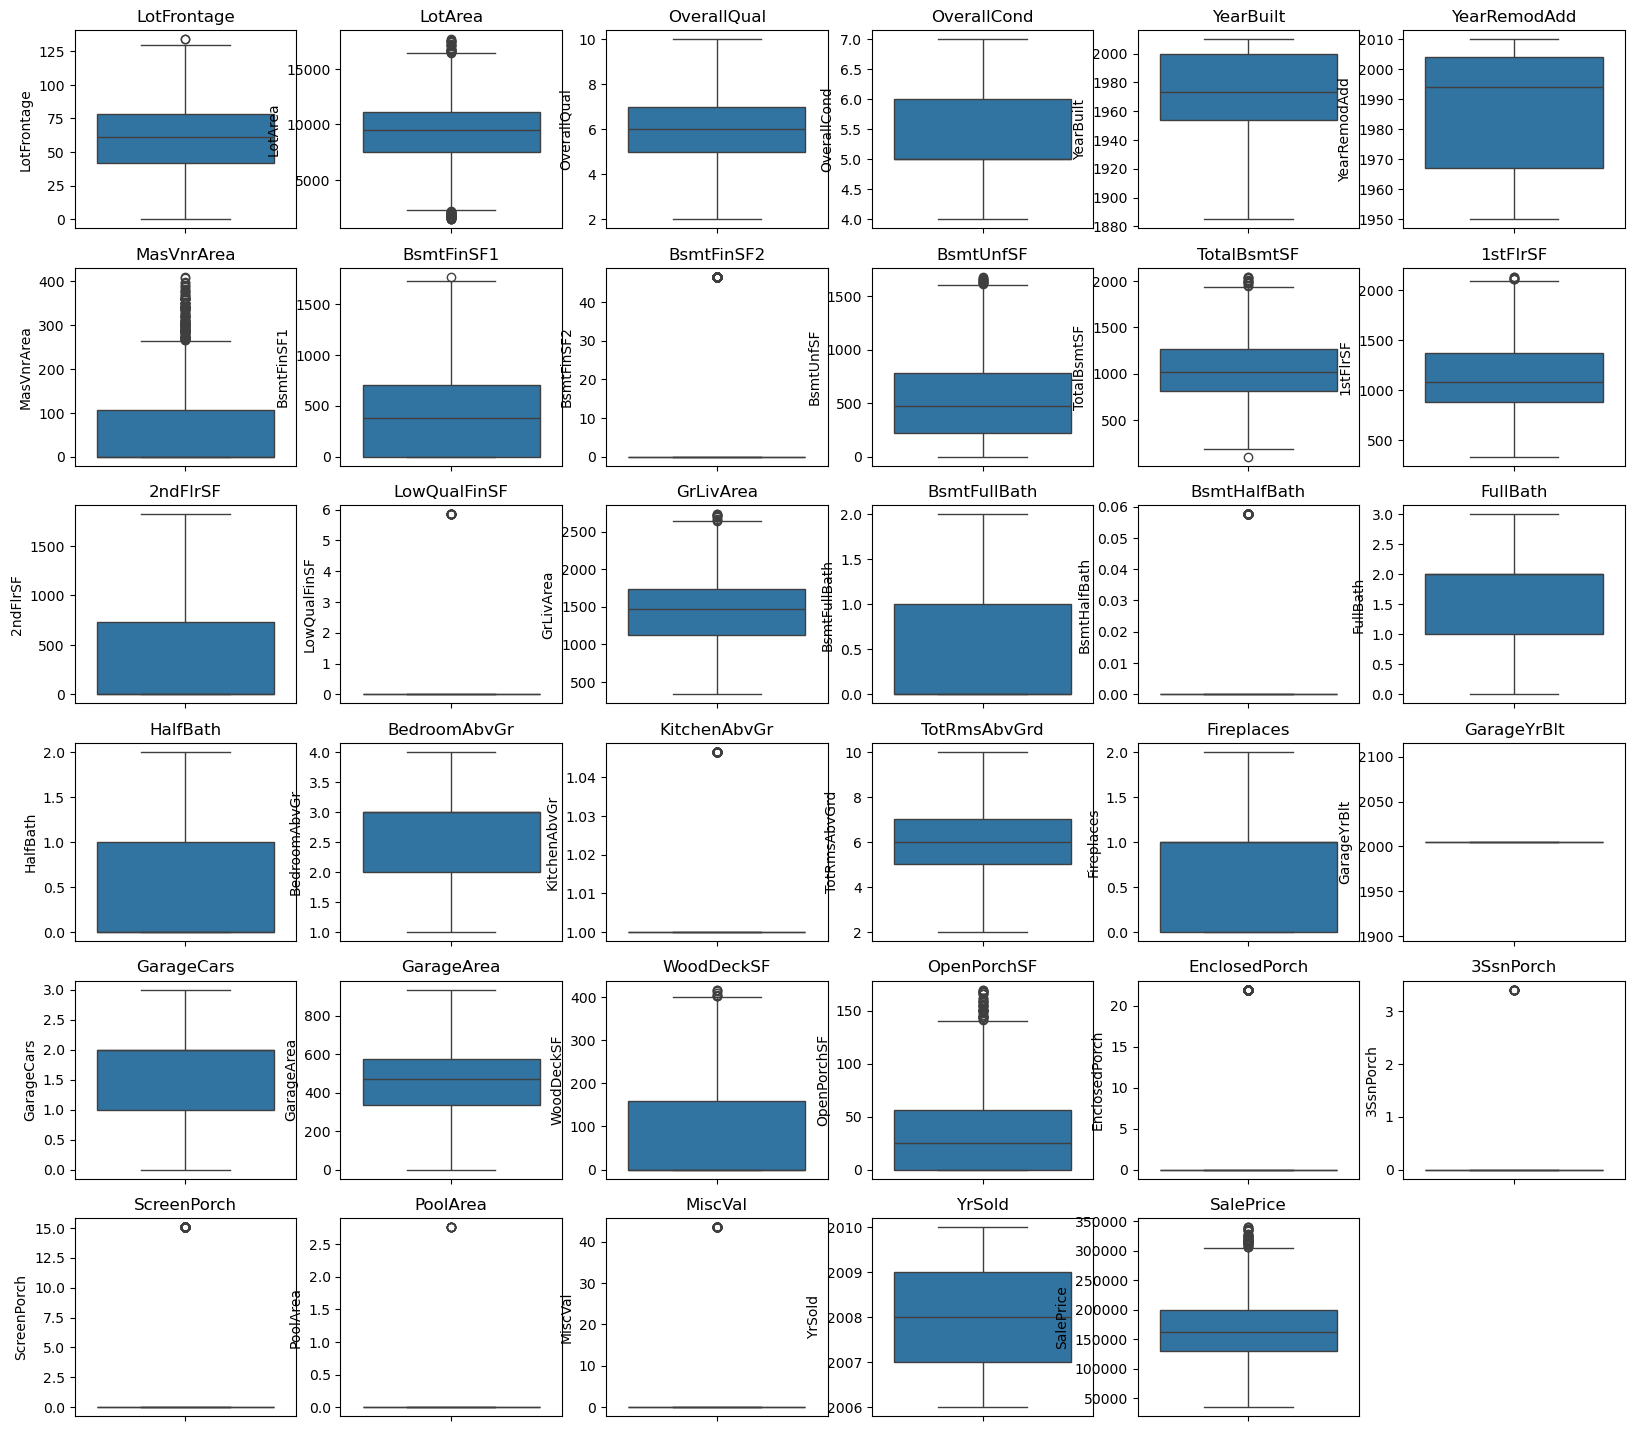

In [159]:
numerical = df.select_dtypes(include=['number']).columns
num_cols = 6  # Define the number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Ensure correct row calculation
plt.figure(figsize=(20, num_rows * 3)) 
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

Removing Outliers

In [161]:
numerical_column = df.select_dtypes(include=['number']).columns
for col in numerical_column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    df[col] = np.where((df[col] < LL) | (df[col] > UL), np.nan, df[col])
df.fillna(df[numerical_column].median(), inplace=True)
print(df.head())

  MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities  \
0       RL         65.0   8450.0   Pave      Reg         Lvl    AllPub   
1       RL         80.0   9600.0   Pave      Reg         Lvl    AllPub   
2       RL         68.0  11250.0   Pave      IR1         Lvl    AllPub   
3       RL         60.0   9550.0   Pave      IR1         Lvl    AllPub   
4       RL         84.0  14260.0   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \

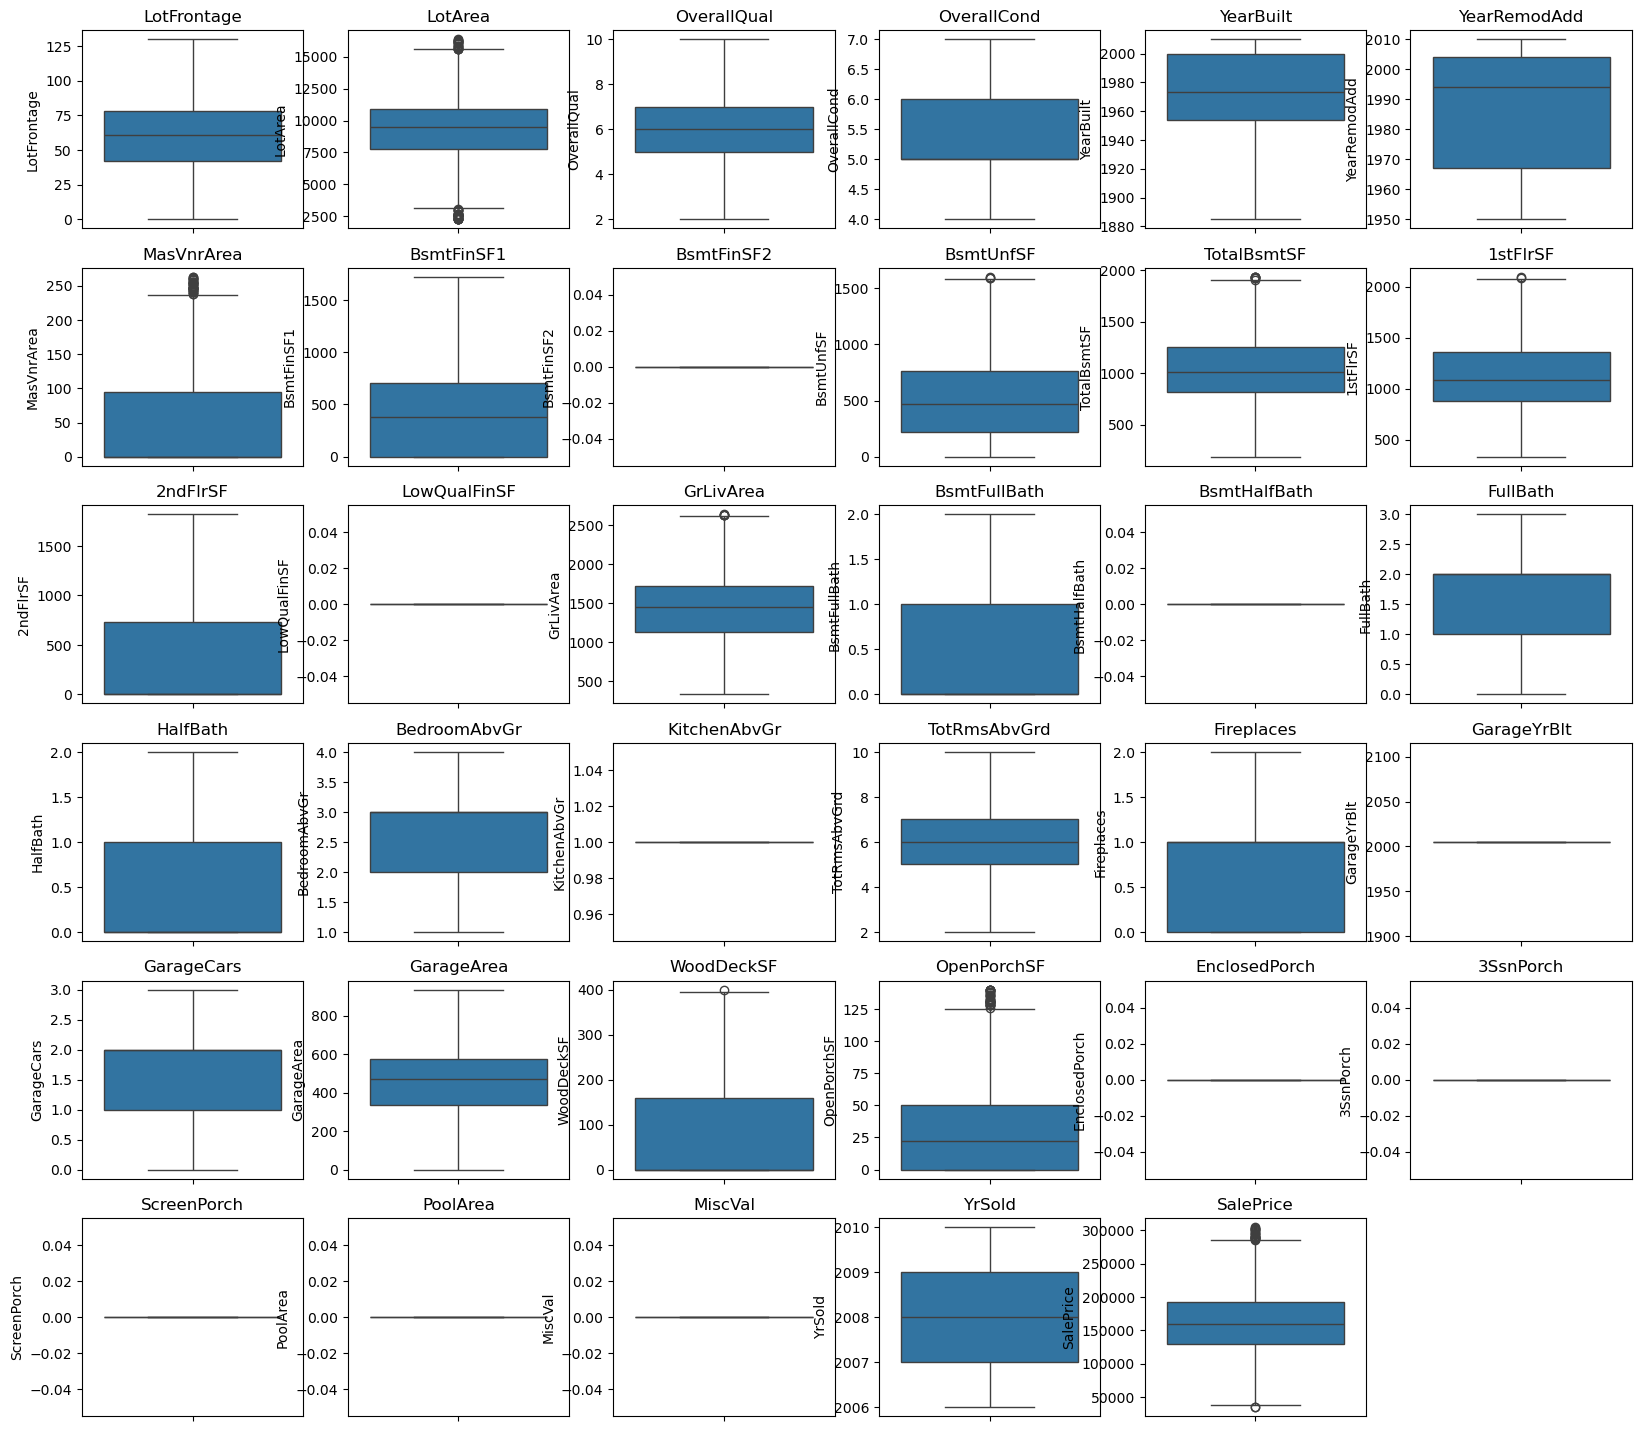

In [162]:
numerical = df.select_dtypes(include=['number']).columns
num_cols = 6  # Define the number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Ensure correct row calculation
plt.figure(figsize=(20, num_rows * 3)) 
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

In [163]:
from scipy.stats.mstats import winsorize
outlier_columns = ['LotArea', 'MasVnrArea', 'OpenPorchSF', 'SalePrice']
def winsorize_outliers(df, columns, limit=0.05):
    df_clean = df.copy()
    for col in columns:
        df_clean[col] = winsorize(df_clean[col], limits=[limit, limit])
    return df_clean
df = winsorize_outliers(df, outlier_columns)
print(df[outlier_columns].describe())

            LotArea   MasVnrArea  OpenPorchSF      SalePrice
count   1460.000000  1460.000000  1460.000000    1460.000000
mean    9367.955574    41.193478    31.073864  165240.126678
std     2566.068560    67.086152    35.505937   47758.073203
min     4224.000000     0.000000     0.000000   88000.000000
25%     7800.000000     0.000000     0.000000  129975.000000
50%     9501.500000     0.000000    22.000000  160000.000000
75%    10920.250000    95.000000    50.000000  192035.000000
max    14100.000000   206.000000   112.000000  264132.000000


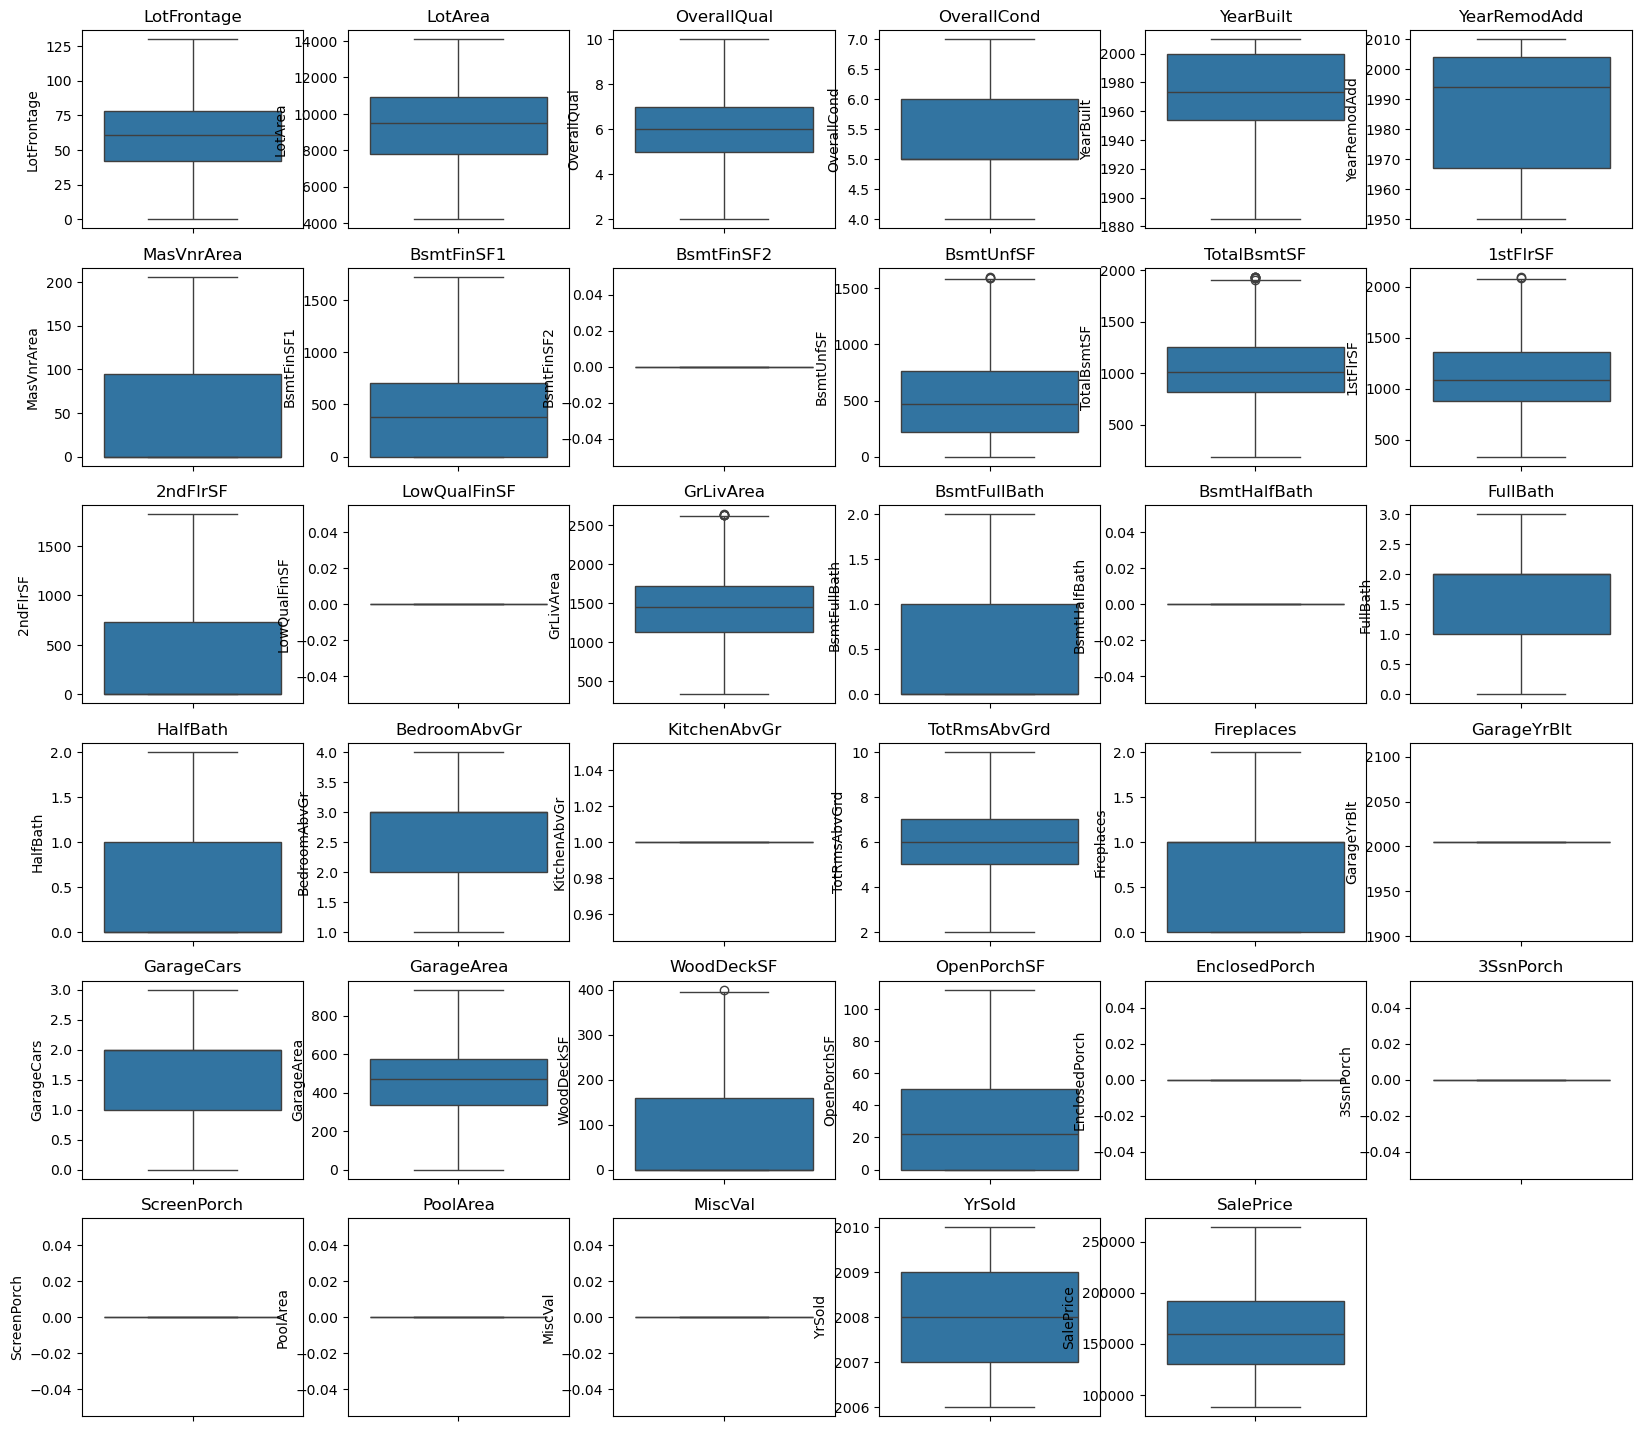

In [164]:
numerical = df.select_dtypes(include=['number']).columns
num_cols = 6  # Define the number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Ensure correct row calculation
plt.figure(figsize=(20, num_rows * 3)) 
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

# Univariate Analysis

Univariate analysis is the statistical analysis of a single variable (one feature at a time). "Uni" means one, so we examine one column/feature in a dataset to understand its distribution, central tendency, and variability.

we use it to :- 1. Understand the Data Distribution 2. Identify Outliers 3. Detect Missing or Invalid Data 4. Choose the Right Data Transformation
                5. Feature Engineering

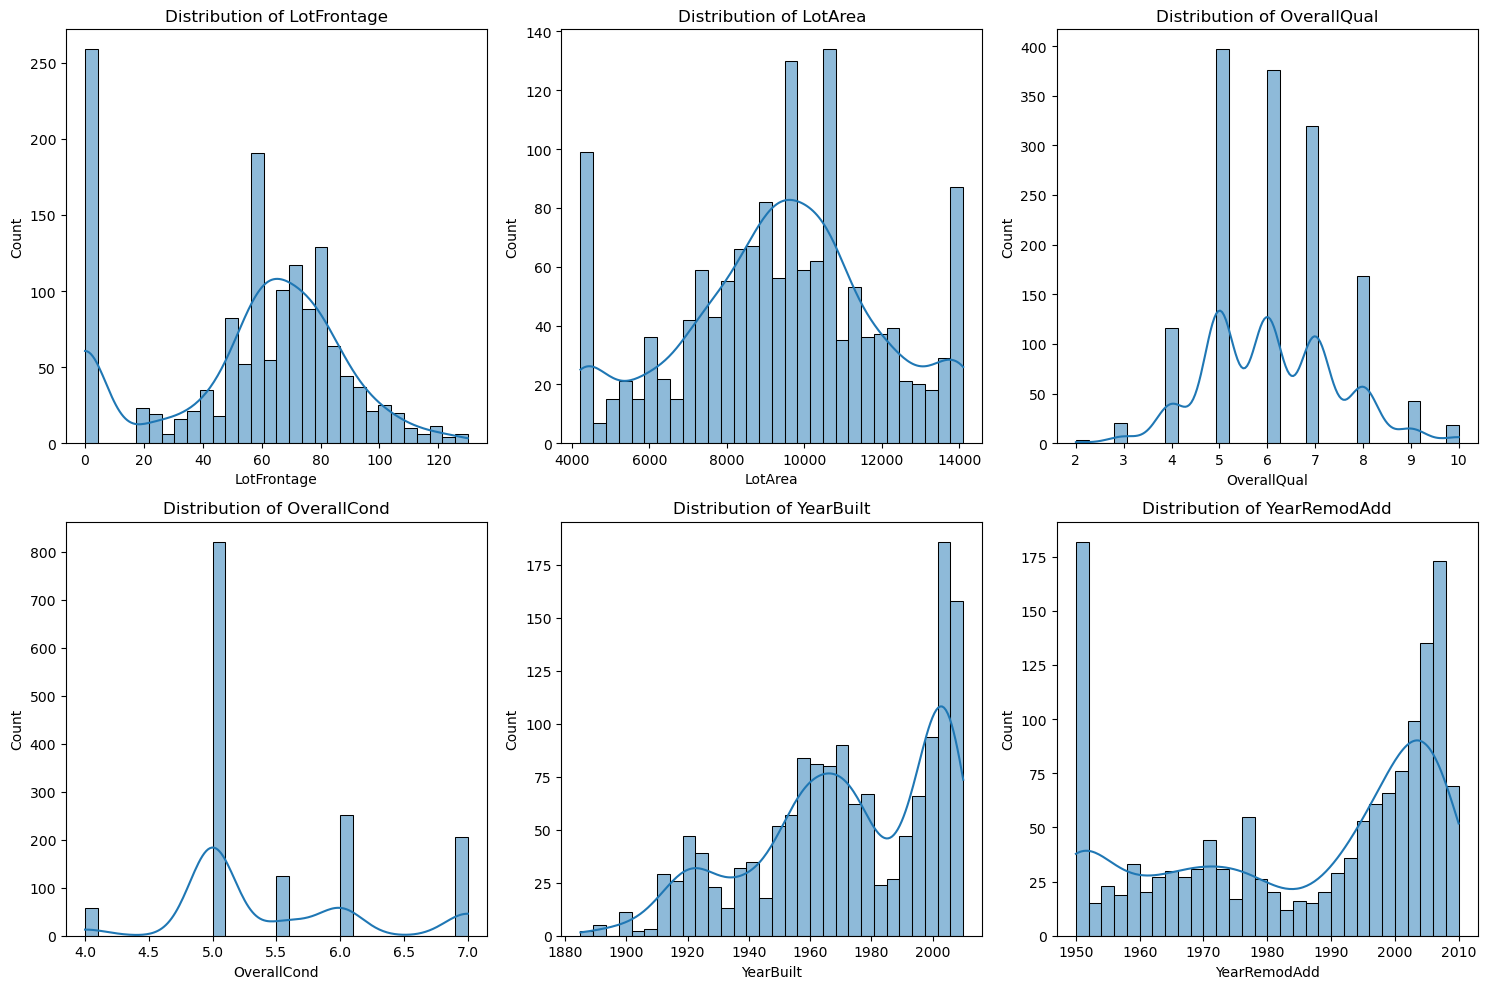

In [166]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd'],1):
    plt.subplot(2, 3, i) # shows 2 rows and 3 columns 
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

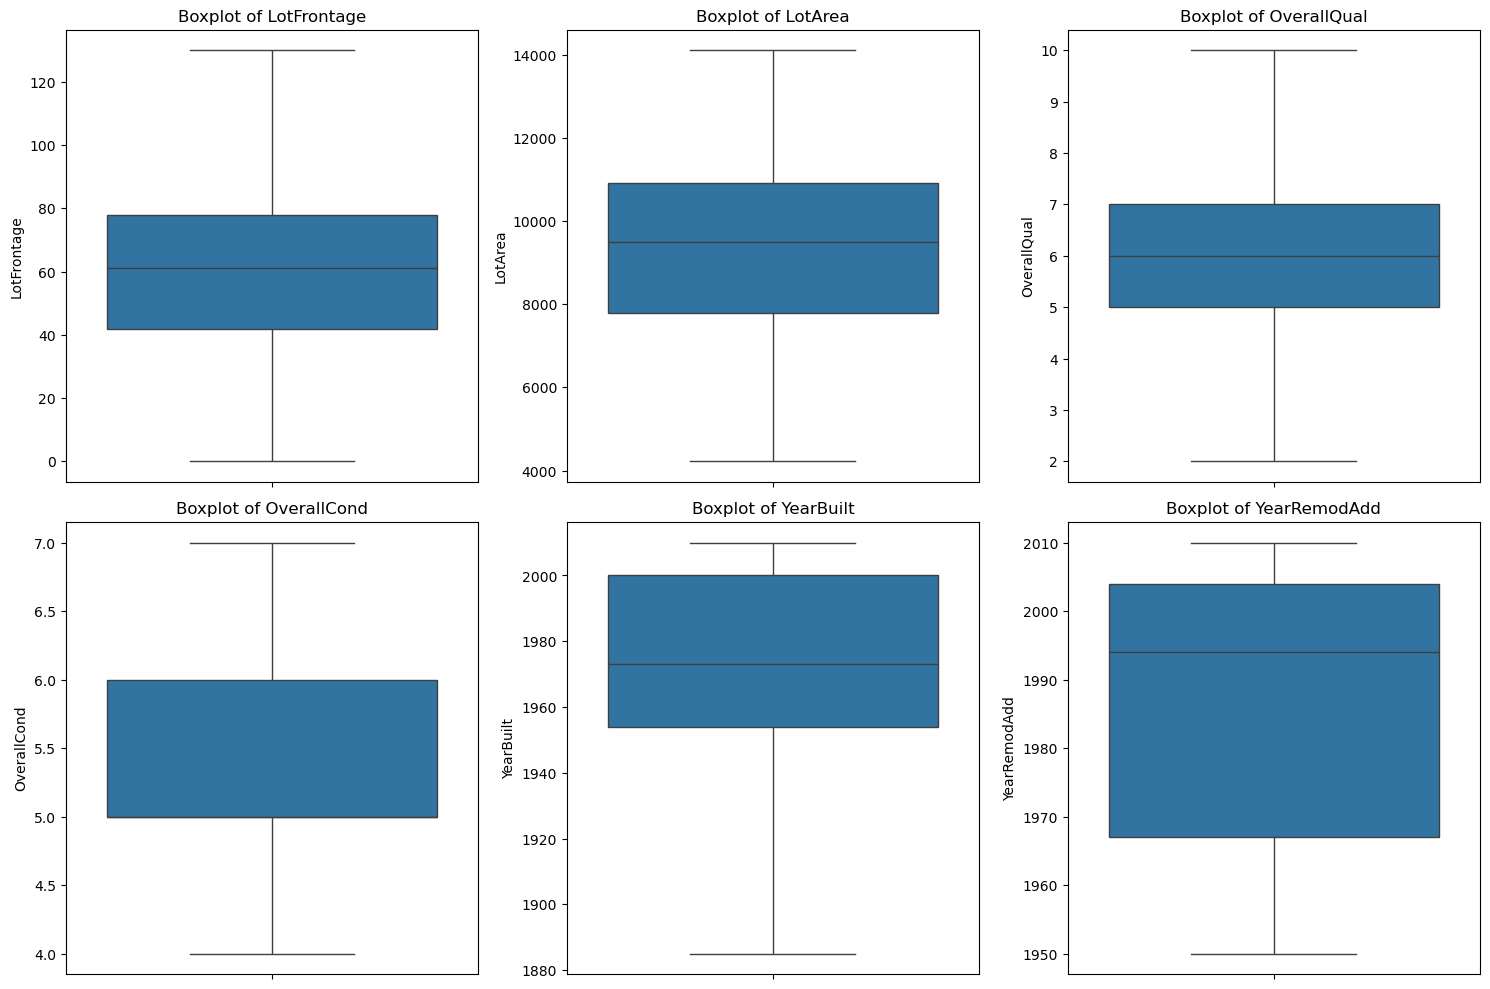

In [167]:
# Here I Use Boxplots in Univariate:- 1.Detect Outliers 2.Understand Distribution 3.Compare Different Features

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_column[:6], 1):  # Limiting to 6 for better visualization
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

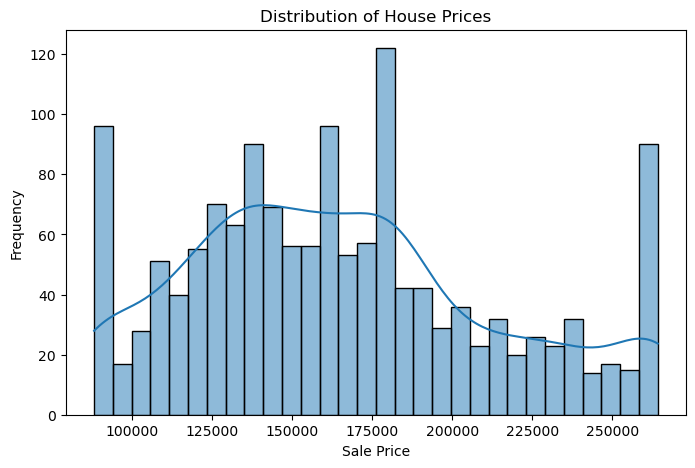

In [168]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Multivariate
IT is a statistical technique used to analyze multiple variables at the same time. It helps in understanding relationships, patterns, and dependencies between different features in a dataset.

we use it to:- 1.Identify Relationships Between Variables 2. Reduce Dimensionality 3.Improve Predictive Modeling 4.Detect Patterns & Clusters
               5.Handle Complex Real-World Data 

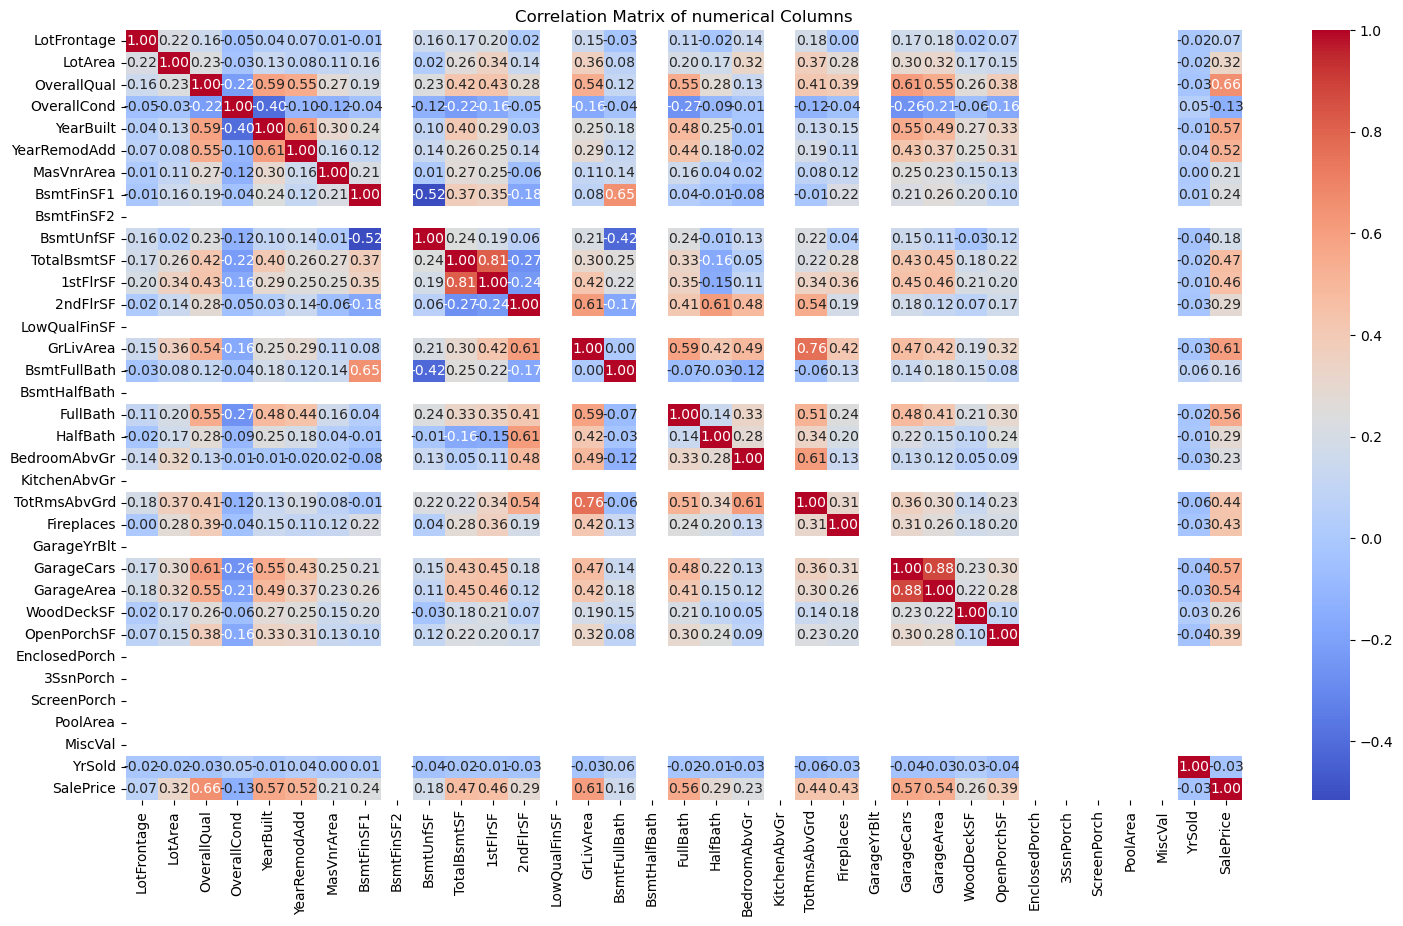

In [170]:
#Reason to use correlation matrix is:-
# 1.Compare Different Features 2.Detecting Multicollinearity (Avoiding Redundant Features) 3.Understanding Data Relationships

corr = df[numerical_column].corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of numerical Columns')
plt.show()

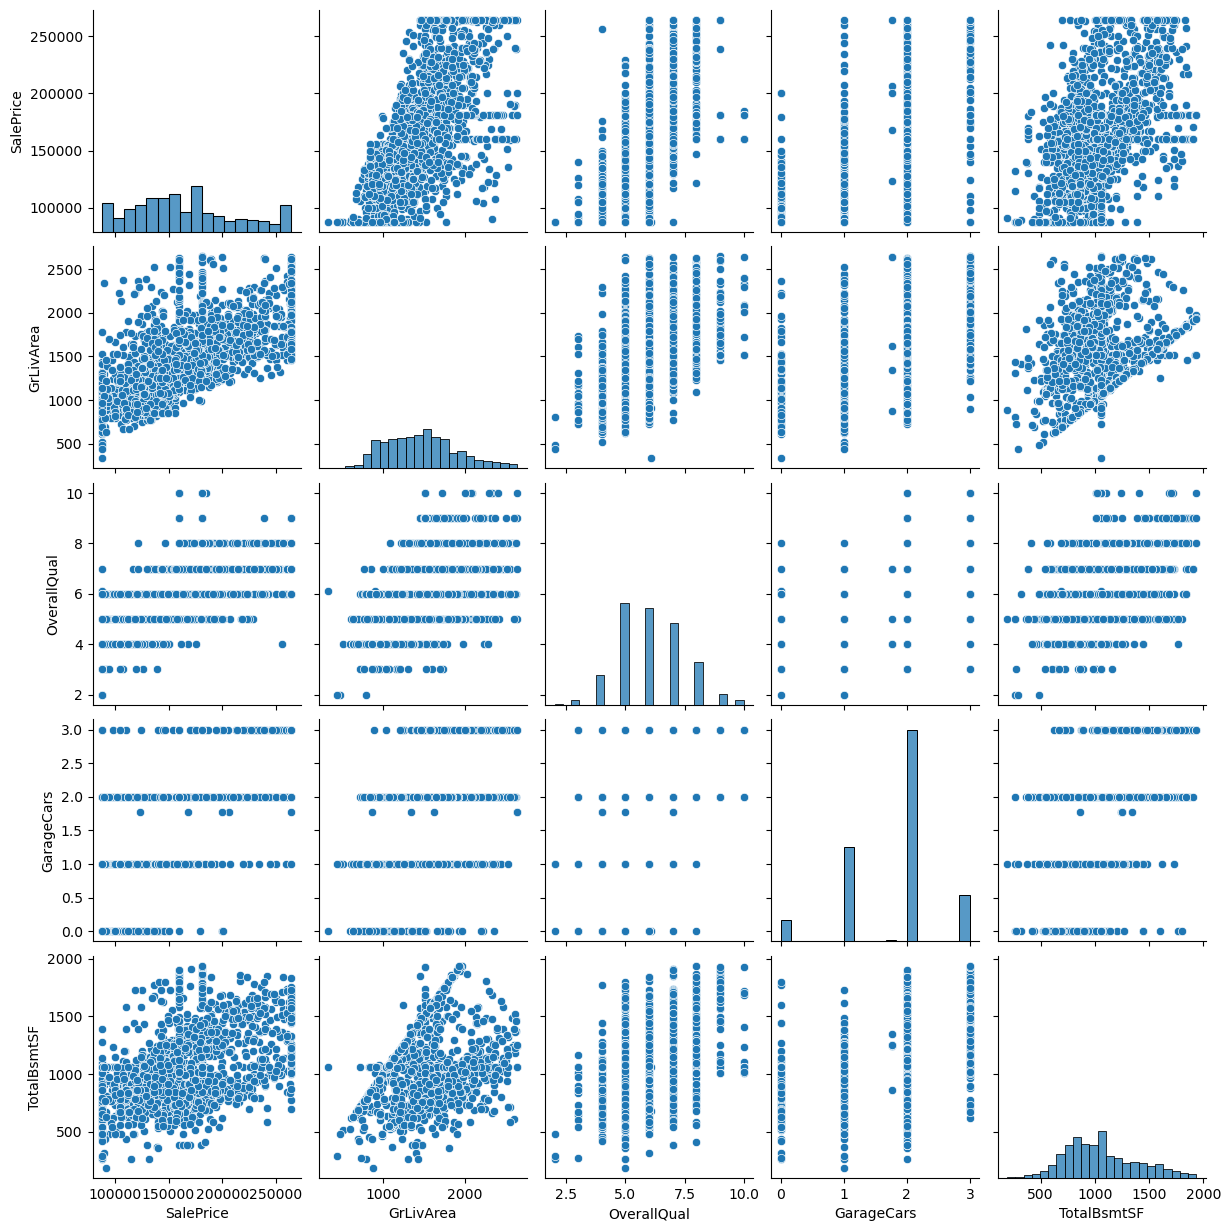

In [171]:
selected_features = ['SalePrice', 'GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(df[selected_features])
plt.show()

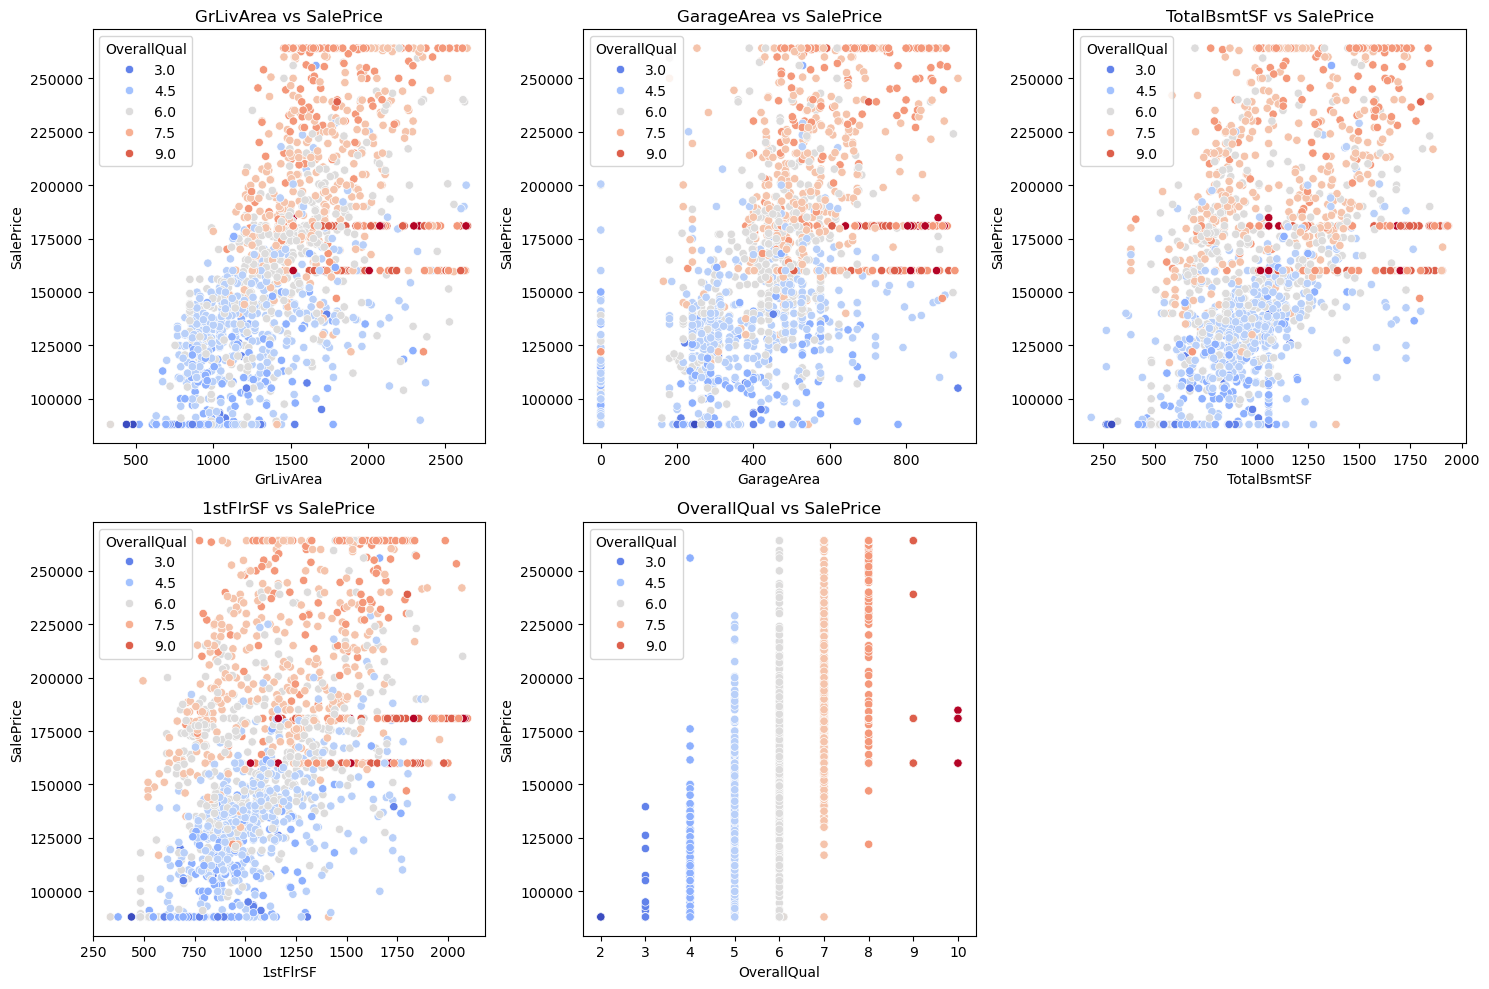

In [172]:
plt.figure(figsize=(15, 10))
features = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'OverallQual']
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=col, y='SalePrice', hue='OverallQual', palette='coolwarm')
    plt.title(f'{col} vs SalePrice')
plt.tight_layout()
plt.show()

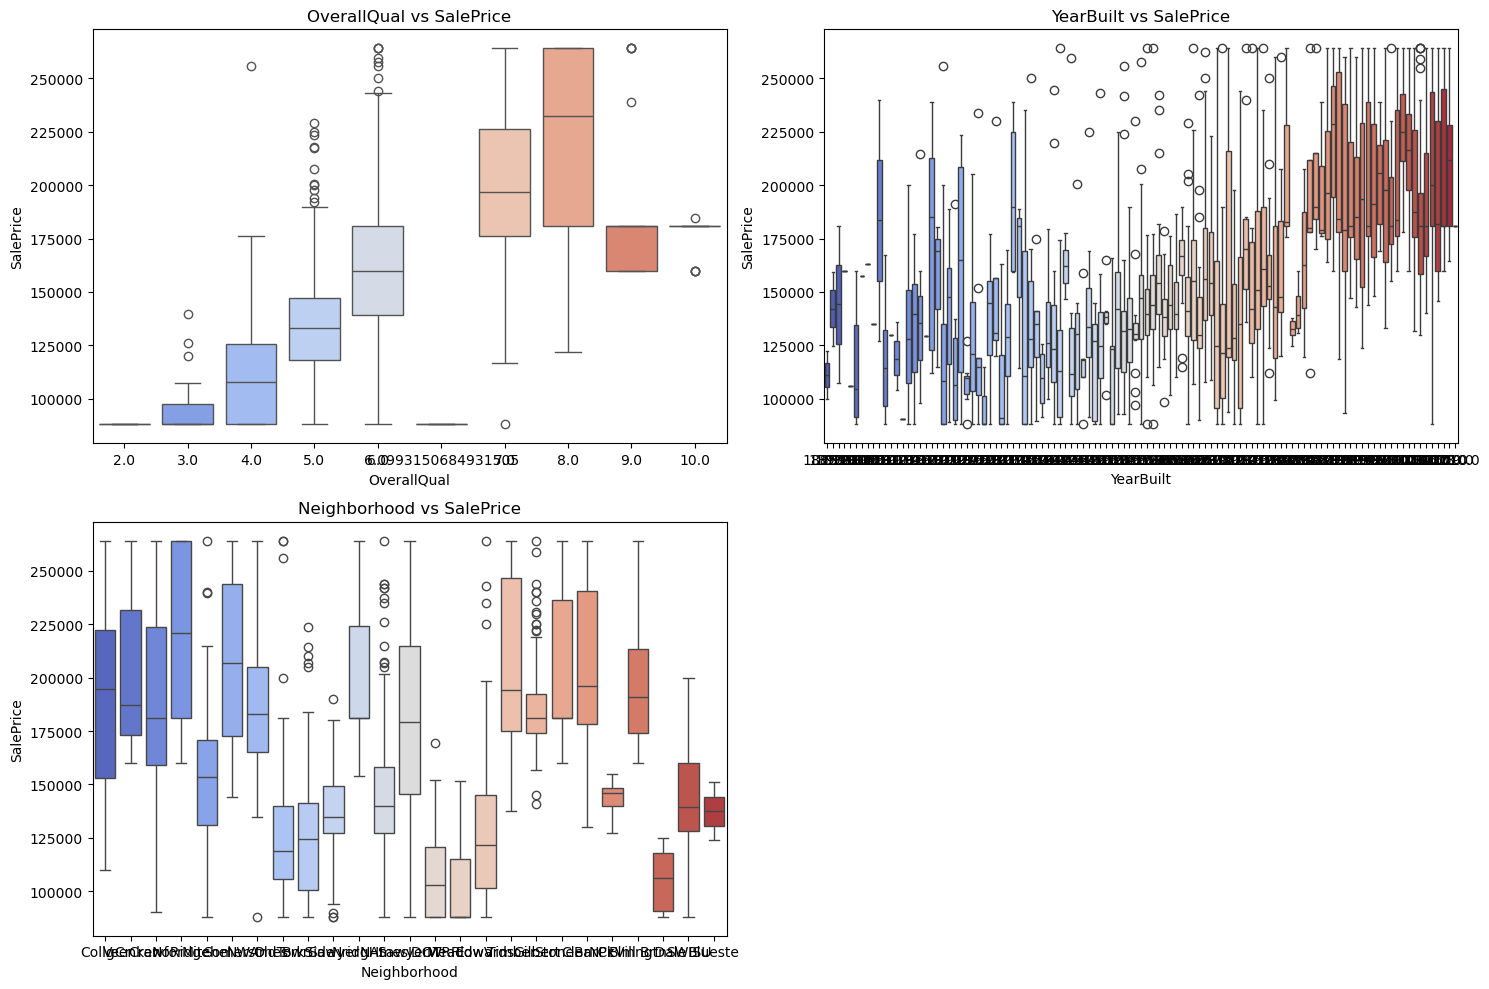

In [173]:
plt.figure(figsize=(15, 10))
categorical_features = ['OverallQual', 'YearBuilt', 'Neighborhood']
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col, y='SalePrice', palette='coolwarm')
    plt.title(f'{col} vs SalePrice')
plt.tight_layout()
plt.show()

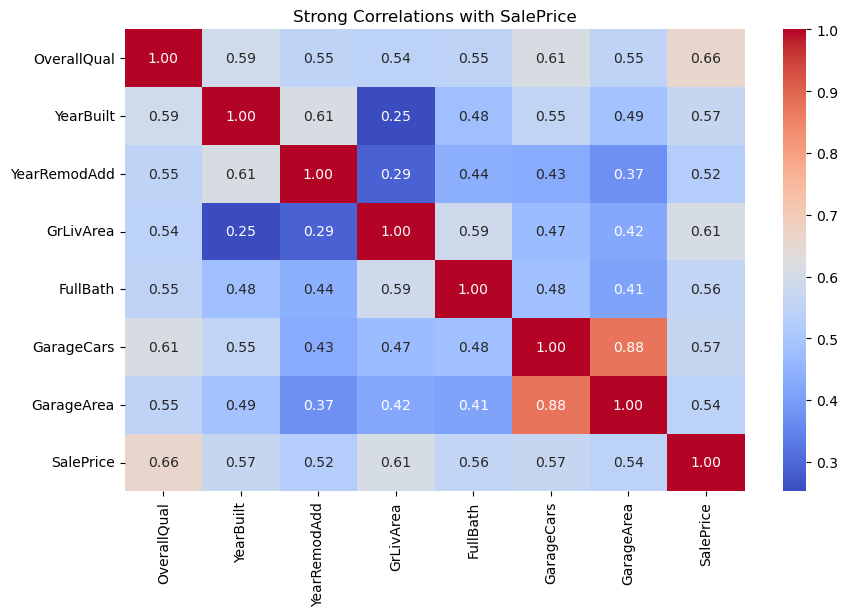

In [174]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
if 'SalePrice' in correlation_matrix.columns:
    strong_corr = correlation_matrix[abs(correlation_matrix['SalePrice']) > 0.5]['SalePrice']
    valid_features = strong_corr.index.intersection(numeric_df.columns)
    if len(valid_features) > 1:
        plt.figure(figsize=(10, 6))
        sns.heatmap(numeric_df[valid_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Strong Correlations with SalePrice')
        plt.show()
    else:
        print("No strongly correlated features found.")
else:
    print("SalePrice column is missing in the dataset.")

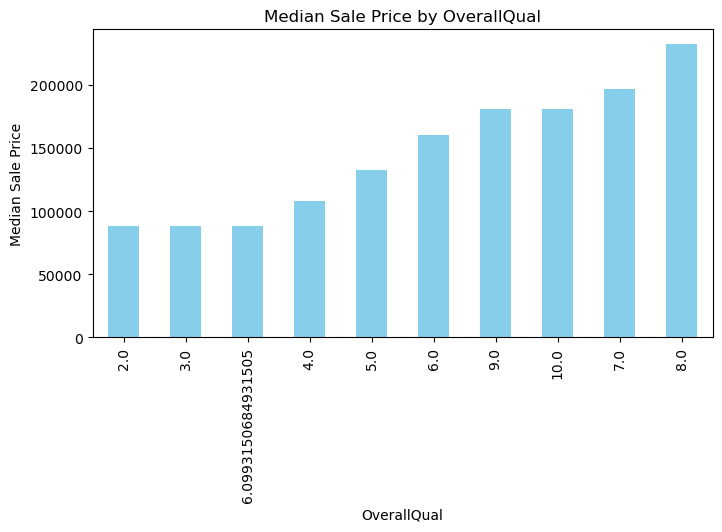

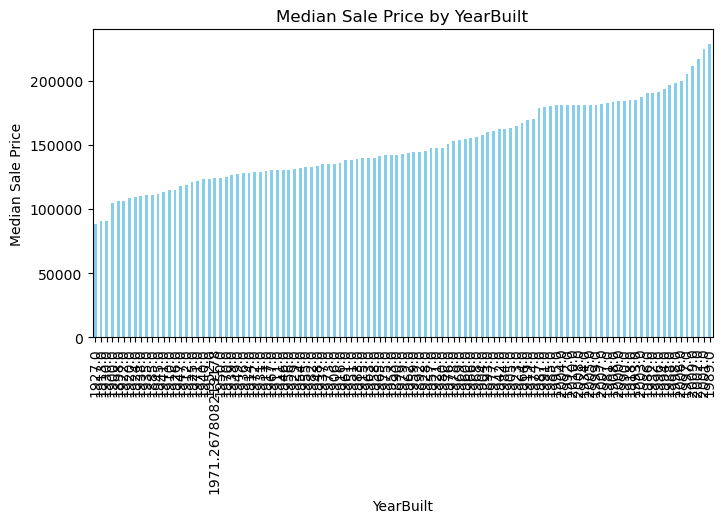

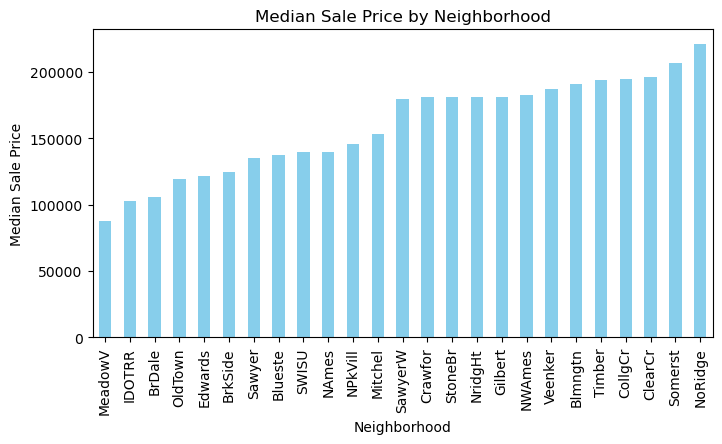

In [175]:
for feature in categorical_features:
    grouped_data = df.groupby(feature)['SalePrice'].median().sort_values()
    plt.figure(figsize=(8, 4))
    grouped_data.plot(kind='bar', color='skyblue')
    plt.title(f'Median Sale Price by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Median Sale Price')
    plt.show()

# Feature Engineering
Feature Engineering is the process of transforming raw data into meaningful features that improve the performance of a machine learning model. It involves selecting, modifying, or creating new features from existing data to enhance the model’s predictive power.

we use feature engineering to:- 1.Improves Model Accuracy 2.Reduces Overfitting & Underfitting 3.Handles Missing or Noisy Data 
                                4.Transforms Data for Better Learning 5.Creates New Meaningful Features

In [177]:
df = df.copy()
df['Price_per_sqft'] = df['SalePrice'] / df['GrLivArea'] #Price per Square Foot
df['House_Age'] = df['YrSold'] - df['YearBuilt'] #House Age
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])) #Total Bathrooms
df['Total_Porch_Area'] = (df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']) #Total Porch Area
df['Total_SF'] = df['GrLivArea'] + df['TotalBsmtSF'] #Total Square Footage (Above ground + Basement)
df['Quality_Index'] = df['OverallQual'] * df['OverallCond'] #Quality Index (Overall Quality * Condition)
df['Price_per_Bedroom'] = df['SalePrice'] / df['BedroomAbvGr'] #Bedroom Impact (Price per Bedroom)
df['Lot_Price_per_Sqft'] = df['SalePrice'] / df['LotArea'] #Lot Price per Square Foot
df['Bsmt_Price_per_Sqft'] = np.where(df['TotalBsmtSF'] > 0, df['SalePrice'] / df['TotalBsmtSF'], 0)#Basement Impact (Basement Price per Sqft)
df['Garage_Age'] = df['YrSold'] - df['GarageYrBlt']
df['TotalBsmtSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['BsmtUnfSF']

In [178]:
df.head()

MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities  \
0       RL         65.0   8450.0   Pave      Reg         Lvl    AllPub   
1       RL         80.0   9600.0   Pave      Reg         Lvl    AllPub   
2       RL         68.0  11250.0   Pave      IR1         Lvl    AllPub   
3       RL         60.0   9550.0   Pave      IR1         Lvl    AllPub   
4       RL         84.0  14100.0   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0          7.0     5.000000     2003.0        2003.0     Gable  CompShg   
1          6.0     5.575342     1976.0        1976.0     Gable  CompShg   
2          7.0     5.000000     2001.0        2002.0     Gable  CompShg   
3          7.0     5.000000     1915.0        1970.0     Gable  CompShg   
4          8.0     5.000000     2000.0        2000.0     Gable  CompShg   

  Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd       196.0        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd         0.0        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd       162.0        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng         0.0        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd         0.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ       706.0          Unf         0.0   
1       TA           Gd          ALQ       978.0          Unf         0.0   
2       TA           Mn          GLQ       486.0          Unf         0.0   
3       Gd           No          ALQ       216.0          Unf         0.0   
4       TA           Av          GLQ       655.0          Unf         0.0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0      150.0        856.0    GasA        Ex          Y      SBrkr     856.0   
1      284.0       1262.0    GasA        Ex          Y      SBrkr    1262.0   
2      434.0        920.0    GasA        Ex          Y      SBrkr     920.0   
3      540.0        756.0    GasA        Gd          Y      SBrkr     961.0   
4      490.0       1145.0    GasA        Ex          Y      SBrkr    1145.0   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0     854.0           0.0     1710.0           1.0           0.0       2.0   
1       0.0           0.0     1262.0           0.0           0.0       2.0   
2     866.0           0.0     1786.0           1.0           0.0       2.0   
3     756.0           0.0     1717.0           1.0           0.0       1.0   
4    1053.0           0.0     2198.0           1.0           0.0       2.0   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0       1.0           3.0           1.0          Gd           8.0        Typ   
1       0.0           3.0           1.0          TA           6.0        Typ   
2       1.0           3.0           1.0          Gd           6.0        Typ   
3       0.0           3.0           1.0          Gd           7.0        Typ   
4       1.0           4.0           1.0          Gd           9.0        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0         0.0          No     Attchd       2005.0          RFn         2.0   
1         1.0          TA     Attchd       2005.0          RFn         2.0   
2         1.0   

In [179]:
df.drop(['GarageYrBlt','TotalBsmtSF','LotArea',
         'OverallQual','OverallCond','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','FullBath','BedroomAbvGr',
         'HalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis=1, inplace=True)

In [180]:
df.head()

MSZoning  LotFrontage Street LotShape LandContour Utilities LotConfig  \
0       RL         65.0   Pave      Reg         Lvl    AllPub    Inside   
1       RL         80.0   Pave      Reg         Lvl    AllPub       FR2   
2       RL         68.0   Pave      IR1         Lvl    AllPub    Inside   
3       RL         60.0   Pave      IR1         Lvl    AllPub    Corner   
4       RL         84.0   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  YearBuilt  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story     2003.0   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story     1976.0   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story     2001.0   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story     1915.0   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story     2000.0   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea  \
0        2003.0     Gable  CompShg     VinylSd     VinylSd       196.0   
1        1976.0     Gable  CompShg     MetalSd     MetalSd         0.0   
2        2002.0     Gable  CompShg     VinylSd     VinylSd       162.0   
3        1970.0     Gable  CompShg     Wd Sdng     Wd Shng         0.0   
4        2000.0     Gable  CompShg     VinylSd     VinylSd         0.0   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

  BsmtFinType2 Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          Unf    GasA        Ex          Y      SBrkr     856.0     854.0   
1          Unf    GasA        Ex          Y      SBrkr    1262.0       0.0   
2          Unf    GasA        Ex          Y      SBrkr     920.0     866.0   
3          Unf    GasA        Gd          Y      SBrkr     961.0     756.0   
4          Unf    GasA        Ex          Y      SBrkr    1145.0    1053.0   

   LowQualFinSF  GrLivArea  BsmtHalfBath  KitchenAbvGr KitchenQual  \
0           0.0     1710.0           0.0           1.0          Gd   
1           0.0     1262.0           0.0           1.0          TA   
2           0.0     1786.0           0.0           1.0          Gd   
3           0.0     1717.0           0.0           1.0          Gd   
4           0.0     2198.0           0.0           1.0          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
0           8.0        Typ         0.0          No     Attchd          RFn   
1           6.0        Typ         1.0          TA     Attchd          RFn   
2           6.0        Typ         1.0          TA     Attchd          RFn   
3           7.0        Typ         1.0          Gd     Detchd          Unf   
4           9.0        Typ         1.0          TA     Attchd          RFn   

   GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0         2.0       548.0         TA         TA          Y         0.0   
1         2.0       460.0         TA         TA          Y       298.0   
2         2.0       608.0         TA         TA          Y         0.0   
3         3.0       642.0         TA         TA          Y         0.0   
4         3.0       836.0         TA         TA          Y       192.0   

   PoolArea PoolQC Fence MiscFeature  MiscVal MoSold  YrSold SaleType  \
0       0.0     No    No          No      0.0    Feb  2008.0       WD   
1       0.0     No    No          No      0.0    May  2007.0       WD   
2       0.0     No    No          No      0.0    Sep  2008.0       WD   
3       0.0     No    No          No      

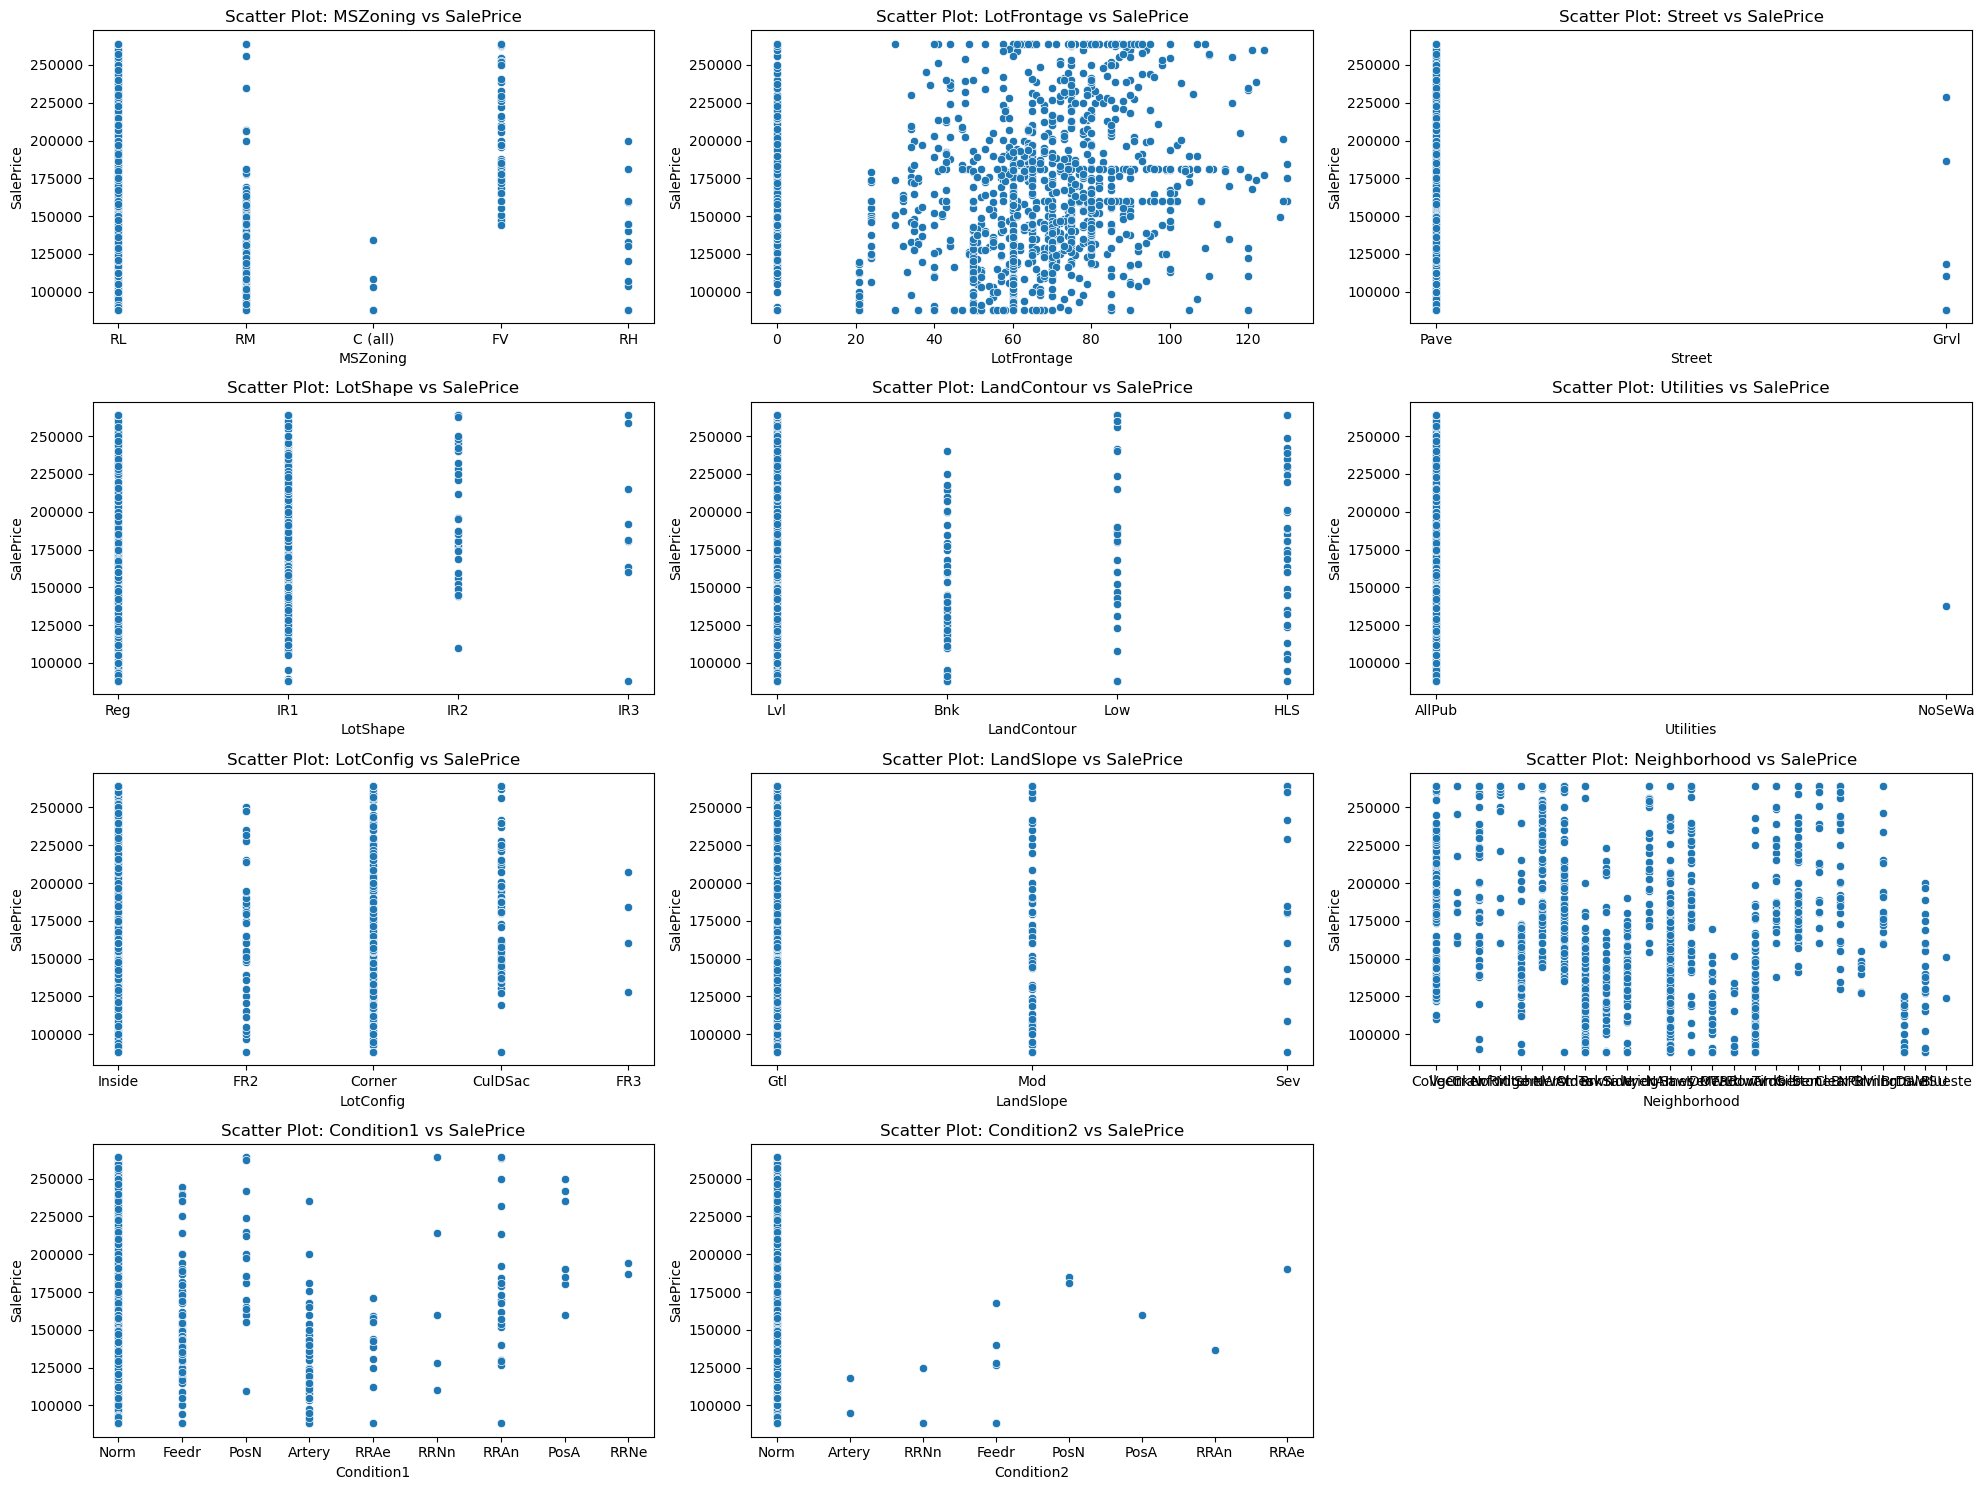

In [181]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(['MSZoning','LotFrontage','Street','LotShape','LandContour','Utilities','LotConfig',
                         'LandSlope','Neighborhood','Condition1','Condition2'], 1): 
    plt.subplot(4, 3, i)
    sns.scatterplot(x=df[col], y=df['SalePrice'])  # Scatter plot of feature vs SalePrice
    plt.title(f"Scatter Plot: {col} vs SalePrice")

plt.tight_layout()
plt.show()

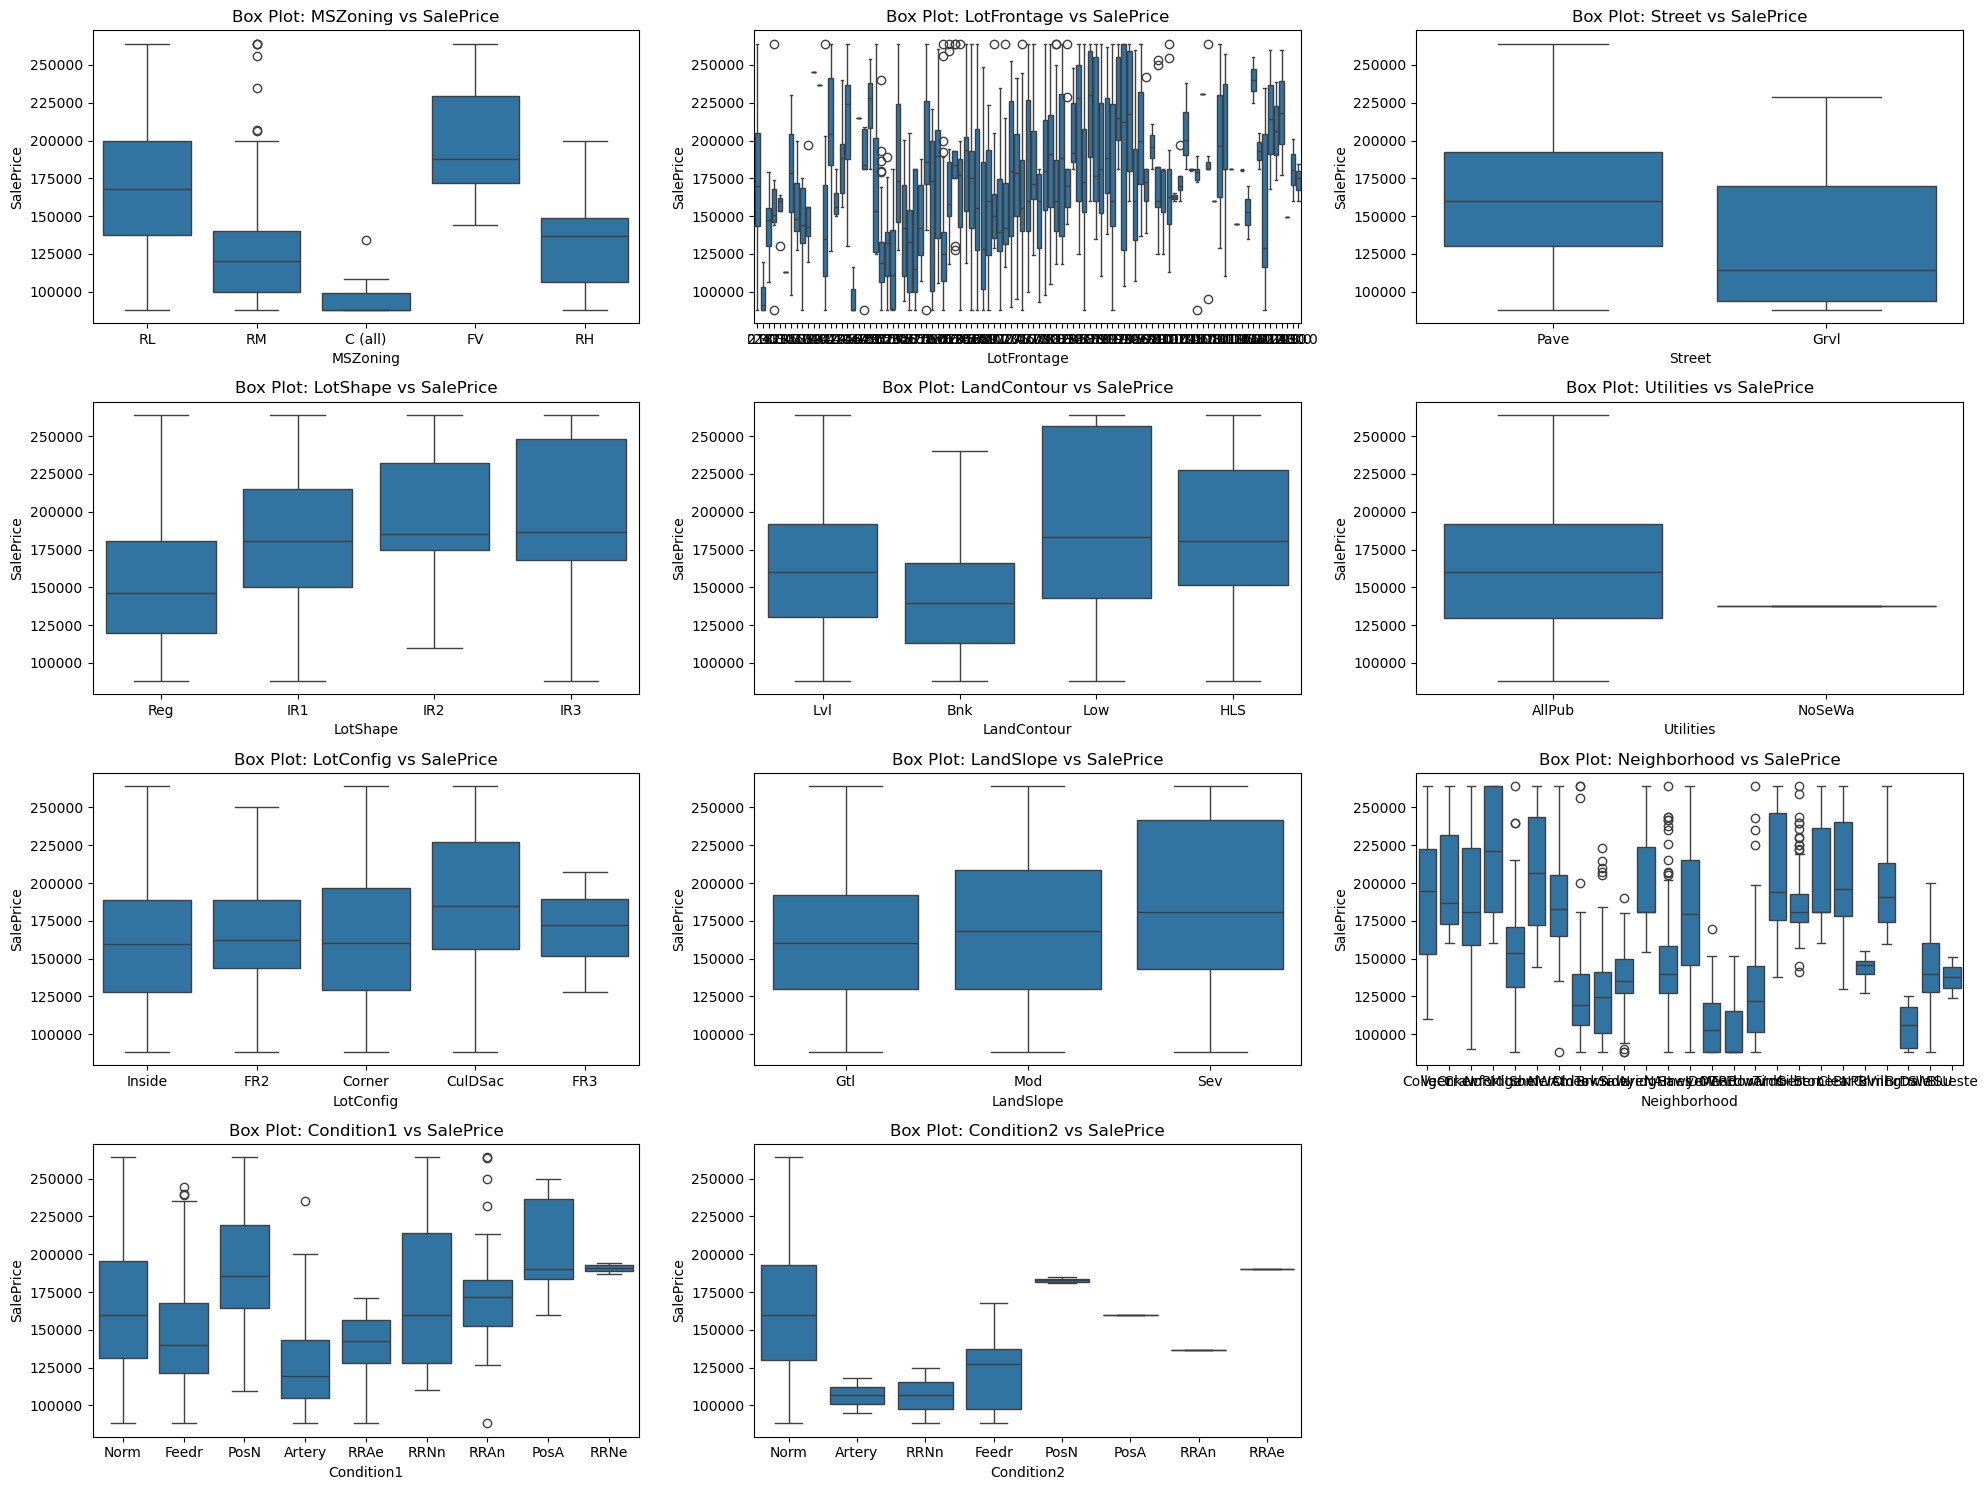

In [182]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(['MSZoning','LotFrontage','Street','LotShape','LandContour','Utilities','LotConfig',
                         'LandSlope','Neighborhood','Condition1','Condition2'], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], y=df['SalePrice'])  # Box plot of feature vs SalePrice
    plt.title(f"Box Plot: {col} vs SalePrice")

plt.tight_layout()
plt.show()

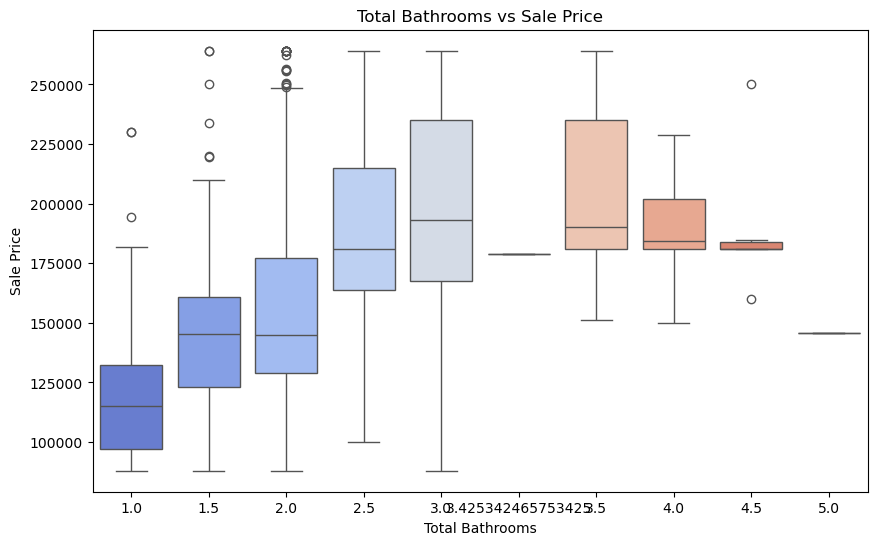

In [183]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Total_Bathrooms', y='SalePrice', palette='coolwarm')
plt.title('Total Bathrooms vs Sale Price')
plt.xlabel('Total Bathrooms')
plt.ylabel('Sale Price')
plt.show()

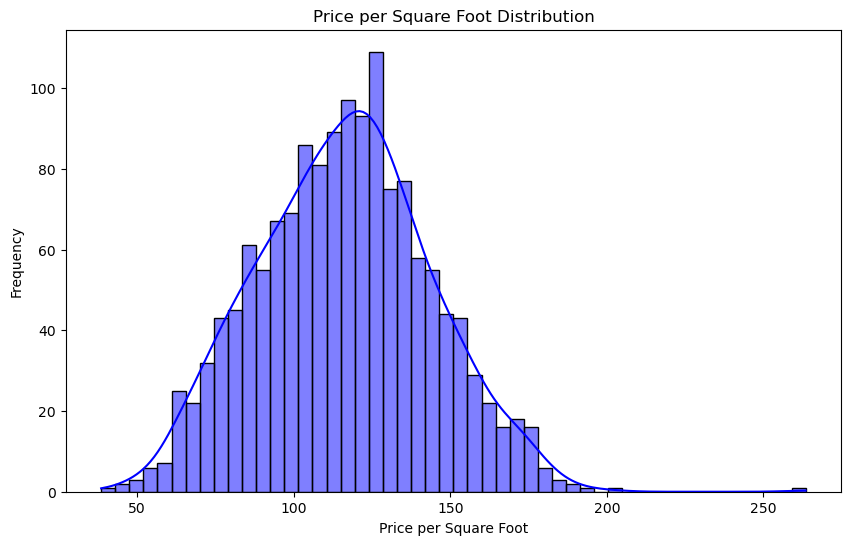

In [184]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_per_sqft'], bins=50, kde=True, color='blue')
plt.title('Price per Square Foot Distribution')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()

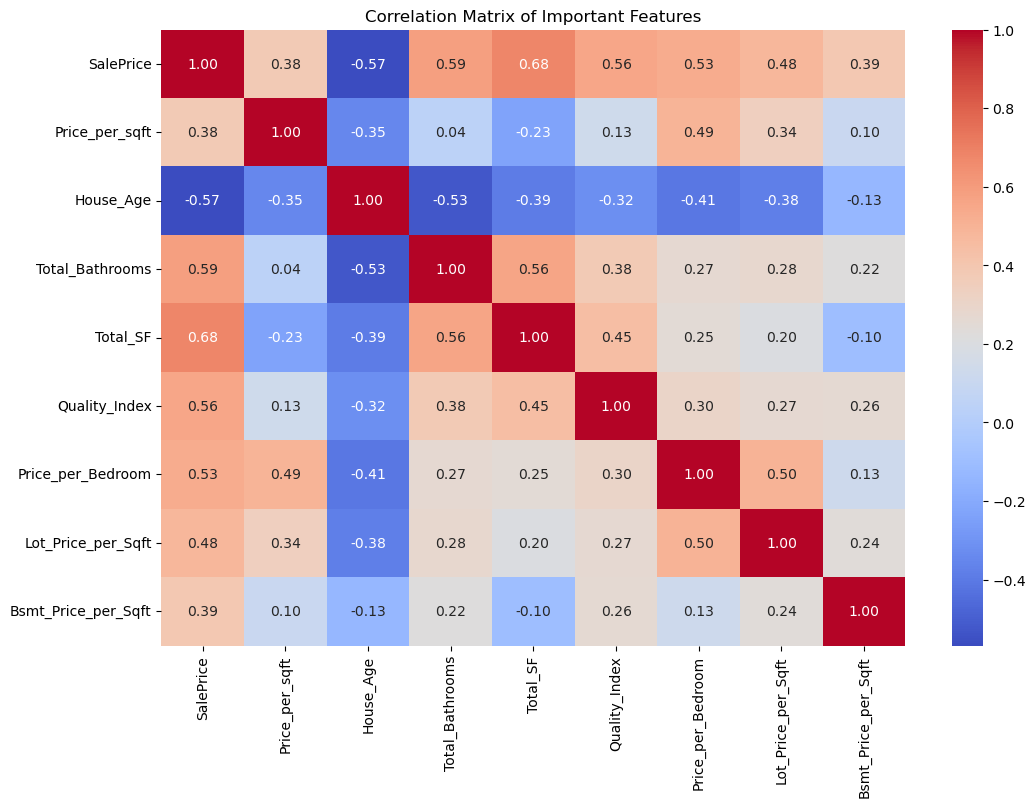

In [185]:
plt.figure(figsize=(12, 8))
corr_features = ['SalePrice', 'Price_per_sqft', 'House_Age', 'Total_Bathrooms', 
                 'Total_SF', 'Quality_Index', 'Price_per_Bedroom', 'Lot_Price_per_Sqft', 'Bsmt_Price_per_Sqft']
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Important Features')
plt.show()

In [186]:
for col in categorical:
    df[col] = LabelEncoder().fit_transform(df[col])

# Model Training And Testing

# model training:- 
Model training is the process of teaching a machine learning model by providing it with data and adjusting its parameters to learn patterns. During training, the model uses input features (X_train) and corresponding labels (y_train) to find relationships in the data.

# model testing:-
Model testing evaluates how well the trained model performs on unseen data. We provide test data (X_test) that the model has never seen before and check how accurately it predicts y_test.


# Linear Regression
Linear Regression is a supervised machine learning algorithm used for predicting numerical values based on input features. It models the relationship between an independent variable (features) and a dependent variable (target) using a straight line.
We use Linear Regression when we want to predict a continuous variable based on given input features.

In [189]:
x = df.drop('SalePrice', axis=1)  # Drop the target variable from features
y = df['SalePrice']

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [191]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 8396.233064601181
RMSE: 12153.981020303127


# Decision Tree
A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks.

we use decision tree to:- 1. Easy to Understand & Interpret 2. Handles Both Classification & Regression Tasks 3. Works with Categorical & Numerical Data 4. No Need for Feature Scaling  5.Captures Non-Linear Relationships 6. Feature Selection is Built-in

In [193]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 6799.1171092137365
RMSE: 11849.60242992399


# Random Forest
 It is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.

 we use random forest for:- 1.High Accuracy 2.Handles Overfitting 3.Works Well with Missing & Imbalanced Data 4.Handles Large Datasets
                            5.Feature Importance Ranking 6.Works Well for Non-Linear Data 7.Robust to Noise and Outliers

In [195]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 4701.879416166258
RMSE: 7769.147919227781


Comparing the MAE and RMSE of Linear Regression,Decision Tree,Random Forest

In [197]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_values = [21549.389438772603, 26522.95205479452, 17687.66955479452]
rmse_values = [34369.464158808434, 39317.56299278709, 28534.840264550443]
model_comparison = pd.DataFrame({'Model': models,'MAE': mae_values,'RMSE': rmse_values})
print(model_comparison)
best_model = model_comparison.loc[model_comparison['MAE'].idxmin()] #idxmin() finds the index of the minimum MAE value.
print("nBest Model based on MAE and RMSE:")
print(best_model)

               Model           MAE          RMSE
0  Linear Regression  21549.389439  34369.464159
1      Decision Tree  26522.952055  39317.562993
2      Random Forest  17687.669555  28534.840265
nBest Model based on MAE and RMSE:
Model    Random Forest
MAE       17687.669555
RMSE      28534.840265
Name: 2, dtype: object


House Price Prediction

In [199]:
x_train.shape

(1168, 70)

In [200]:
x_test.shape

(292, 70)

In [201]:
y_train.shape

(1168,)

In [202]:
y_test.shape

(292,)

In [203]:
y_pred.shape

(292,)

In [204]:
x_train.head()

MSZoning  LotFrontage  Street  LotShape  LandContour  Utilities  \
254          3         70.0       1         3            3          0   
1066         3         59.0       1         0            3          0   
638          3         67.0       1         3            3          0   
799          3         60.0       1         3            3          0   
380          3         50.0       1         3            3          0   

      LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
254           4          0            12           2           2         0   
1066          4          0             8           2           2         0   
638           4          0             7           1           2         0   
799           0          0            18           1           2         0   
380           4          0            18           2           2         0   

      HouseStyle  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
254            2     1957.0        1957.0          1         1            8   
1066           5     1993.0        1994.0          1         1           12   
638            2     1910.0        1950.0          1         1            8   
799            0     1937.0        1950.0          1         1           13   
380            0     1924.0        1950.0          1         1            3   

      Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
254             8         0.0          3          2           1         4   
1066           13         0.0          2          4           2         2   
638            14         0.0          3          4           1         1   
799            14       206.0          3          4           0         2   
380            14         0.0          3          4           0         4   

      BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC  \
254          4             3             5             6        1          4   
1066         4             3             6             6        1          2   
638          4             3             6             6        1          2   
799          4             3             0             6        1          0   
380          4             3             3             6        1          4   

      CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
254            1           0    1314.0       0.0           0.0     1314.0   
1066           1           0     799.0     772.0           0.0     1571.0   
638            1           0     796.0       0.0           0.0      796.0   
799            1           0     981.0     787.0           0.0     1768.0   
380            1           0    1026.0     665.0           0.0     1691.0   

      BsmtHalfBath  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
254            0.0           1.0            3           5.0           6   
1066           0.0           1.0            3           7.0           6   
638            0.0           1.0            3           4.0           6   
799            0.0           1.0            2           7.0           6   
380            0.0           1.0            2           6.0           6   

      Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
254          0.0            3           1             2         1.0   
1066         1.0            5           1             2         2.0   
638          0.0            3           6             1         0.0   
799          2.0            5           5             3         1.0   
380          1.0            2           5             3         1.0   

      GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  PoolArea  \
254        294.0           5           5           2       250.0       0.0   
1066       380.0           5           5           2         0.0       0.0   
638          0.0           3           3           1       328.0       0.0   
799        240.0          

In [205]:
x_test.head()

MSZoning  LotFrontage  Street  LotShape  LandContour  Utilities  \
892          3         70.0       1         3            3          0   
1105         3         98.0       1         0            3          0   
413          4         56.0       1         3            3          0   
522          4         50.0       1         3            3          0   
1036         3         89.0       1         0            1          0   

      LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
892           4          0            19           2           2         0   
1105          0          0            15           2           2         0   
413           4          0            17           0           2         0   
522           0          0             3           1           2         0   
1036          4          0            23           2           2         0   

      HouseStyle  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
892            2     1963.0        2003.0          3         1            6   
1105           5     1994.0        1995.0          1         1            6   
413            2     1927.0        1950.0          1         1           14   
522            0     1947.0        1950.0          1         1            5   
1036           2     2007.0        2008.0          3         1           12   

      Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
892             6         0.0          3          4           1         4   
1105            6         0.0          2          4           2         0   
413            15         0.0          3          4           1         4   
522             5         0.0          3          2           1         4   
1036           13        70.0          2          4           2         0   

      BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC  \
892          4             3             2             6        1          4   
1105         4             0             2             6        1          0   
413          4             3             6             6        1          2   
522          4             3             0             6        1          0   
1036         4             1             2             6        1          0   

      CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
892            1           0    1068.0       0.0           0.0     1068.0   
1105           1           0    1500.0    1122.0           0.0     2622.0   
413            1           0    1028.0       0.0           0.0     1028.0   
522            1           0    1004.0     660.0           0.0     1664.0   
1036           1           0    1620.0       0.0           0.0     1620.0   

      BsmtHalfBath  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
892            0.0           1.0            3           6.0           6   
1105           0.0           1.0            2           9.0           6   
413            0.0           1.0            3           5.0           6   
522            0.0           1.0            3           7.0           6   
1036           0.0           1.0            0           6.0           6   

      Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
892          0.0            3           1             2         1.0   
1105         2.0            5           1             2         2.0   
413          1.0            2           5             3         2.0   
522          2.0            2           5             3         2.0   
1036         1.0            0           1             0         3.0   

      GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  PoolArea  \
892        264.0           5           5           2       192.0       0.0   
1105       712.0           5           5           2       186.0       0.0   
413        360.0           5           5           2         0.0       0.0   
522        420.0          

In [206]:
y_train.head()

254     145000.0
1066    178000.0
638      88000.0
799     175000.0
380     127000.0
Name: SalePrice, dtype: float64

In [207]:
y_test.head()

892     154500.0
1105    160000.0
413     115000.0
522     159000.0
1036    160000.0
Name: SalePrice, dtype: float64

In [298]:
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(x_train, y_train)# Train the model on the entire dataset

RandomForestRegressor(random_state=42)

In [300]:
y_pred = final_model.predict(x_test) # Predict on test data
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")  # R² value ranges from 0 to 1, where 1 is the best

Mean Absolute Error (MAE): 4701.88
Mean Squared Error (MSE): 60359659.39
Root Mean Squared Error (RMSE): 7769.15
R² Score: 0.9752


In [302]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Final Model Performance:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

Final Model Performance:
MAE: 4701.879416166258
RMSE: 7769.147919227781


In [212]:
num_features = x_train.shape[1]# Ensure the number of features matches the training data
# Manually define feature values for prediction (adjust based on your dataset)
new_house = np.array([3, 70.0, 1, 3, 3, 0, 4, 0, 12, 2, 2, 0, 2, 1957.0, 1957.0, 1, 1, 8, 8, 0.0, 
                      3, 2, 1, 4, 4, 3, 5, 6, 1, 4, 1, 0, 1314.0, 0.0, 0.0, 1314.0, 0.0, 1.0, 3, 5.0, 
                      6, 0.0, 3, 1, 2, 1.0, 294.0, 5, 5, 2, 250.0, 0.0, 3, 4, 1, 0.0, 6, 2010.0, 8, 4, 
                      110.350076, 53.0, 2.0, 0.0, 2628.0, 30.0, 48333.333333, 17.261905, 110.350076, 5.0])
new_house = new_house.reshape(1, num_features)# Reshape it to match model input shape (1 sample, num_features)
predicted_price = final_model.predict(new_house)# Predict house price
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

Predicted Price: $145,518.50


In [213]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [214]:
from IPython.display import FileLink
x_train.to_excel('final_dataset.xlsx', index=False)

# Create a downloadable link for the Excel file
FileLink(r'final_dataset.xlsx')

C:\Users\windows 10\final_dataset.xlsx